# Product Range Analysis
## I. Data Preprocessing & Exploratory Data Analysis

by: ***Dorothy Kunth***

## Table of Contents

- [Project Overview](#overview)
- [Data Preprocessing](#DPP)
- [Exploratory Data Analysis](#EDA)

<a id='overview'></a>
## Overview

You are given a sales transactions history data of an online store that sells household goods. Perform product range and customer segmentation analysis to help the stakeholders identify the top performing products, categories, and customers. 


### Business Problem
Based on the sales transactions data:
1. Identify the top performers: top customer, top product, and top category
2. Identify the customer segments based on RFM
3. Did higher-priced products contribute to higher sales than the lower-priced products?
4. Were sales higher during Christmas season (December) as compared to other months?


### Datasets and Attributes

The original dataset contains **541909** transaction records from **2018-11-29 to 2019-12-07**. It has 7 attributes:

- **InvoiceNo**: Invoice reference number uniquely assigned for each transaction. If the InvoiceNo starts with 'C', it indicates a cancellation
- **StockCode**: Product or item code uniquely assigned to each distinct product
- **Description**: Product or item name
- **Quantity**: The quantities for each product or item per transaction
- **InvoiceDate**: Invoice date and time, the day and time the transaction was generated by the system
- **UnitPrice**: Product price per unit
- **CustomerID**: Customer reference number uniquely assigned to each customer


### Project Scope
1. Data Preprocessing 
2. Exploratory Data Analysis
3. Customer Segmentation based on RFM Metrics (using percentile ranking and K-means clustering)
4. Product Categorization & Product Category Analysis
5. Statistical Hypotheses
6. Insights
7. Dashboard

<a id='DPP'></a>
## Data Preprocessing

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset

sales_df = pd.read_csv('../data/ecommerce_dataset_us.csv', sep='\t', parse_dates=['InvoiceDate'])
sales_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0


In [3]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 28.9+ MB


#### Issues:

- Decimal values from CustomerID should be removed.
- CustomerID has null values.
- CustomerID should be changed to object/string.

In [4]:
# Fill the missing values on CustomerID with 0, change data typer to int then to string

sales_df['CustomerID'] = sales_df['CustomerID'].fillna(0).astype('int64').astype('str')
sales_df['CustomerID'].head()

0    17850
1    17850
2    17850
3    17850
4    17850
Name: CustomerID, dtype: object

In [5]:
sales_df['CustomerID'].head()

0    17850
1    17850
2    17850
3    17850
4    17850
Name: CustomerID, dtype: object

In [6]:
sales_df.describe()

,Quantity,InvoiceDate,UnitPrice
count,541909.000000,541909,541909.000000
mean,9.552250,2019-07-02 13:34:57.156386560,4.611114
min,-80995.000000,2018-11-29 08:26:00,-11062.060000
25%,1.000000,2019-03-26 11:34:00,1.250000
50%,3.000000,2019-07-17 17:17:00,2.080000
75%,10.000000,2019-10-17 11:27:00,4.130000
max,80995.000000,2019-12-07 12:50:00,38970.000000
std,218.081158,NaN,96.759853


#### Observations/Notes:
- Positive and matching negative quantities could indicate a return or cancellation of an order.
- Transactions covered between 2008-11-29 and 2019-12-07.
- Having negative values on UnitPrice is unusual.
- Further investigation is needed on Quantity and UnitPrice due to outliers. Quantity's max is 80995 and mean is 9.5. UnitPrice's max is 38,970.00 and mean is 4.61.

In [7]:
sales_df.describe(include='object')

,InvoiceNo,StockCode,Description,CustomerID
count,541909,541909,540455,541909
unique,25900,4070,4223,4373
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,0
freq,1114,2313,2369,135080


In [8]:
# Check for missing values

sales_df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
dtype: int64

#### Observations/Notes:
- There are 541909 InvoiceNo's, but only 25900 are unique. This means that there are multiple records bearing the same invoice number which is normal in e-commerce (eg. invoice having multiple lines).
- Same goes for StockCode and Description. However, StockCode and Description ideally should have the same number of unique values. In this case, StockCode has 4070 unique values and Description has 4223, which could mean that there are stock codes that have multiple descriptions. 
- StockCodes can be a combination of numeric and alpha characters (e.g. 85123A).
- There are records without description.
- CustomerID's top or most common value is 0 (NaNs were replaced by 0's).

In [9]:
# Change all 0's to NaN in customer id to bring back the missing values

sales_df['CustomerID'].replace('0', np.nan, inplace = True)

In [10]:
# Create a LineTotal by multiplying UnitPrice and Quantity

sales_df['LineTotal'] = sales_df['Quantity'] * sales_df['UnitPrice']
sales_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,LineTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850,15.30
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850,20.34
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2019-12-07 12:50:00,0.85,12680,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2019-12-07 12:50:00,2.10,12680,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2019-12-07 12:50:00,4.15,12680,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2019-12-07 12:50:00,4.15,12680,16.60


In [11]:
# Check for duplicate records

sales_df.duplicated().sum()

5268

In [12]:
sales_df[sales_df.duplicated(keep=False)].sort_values(by=['CustomerID', 'InvoiceNo', 'StockCode'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,LineTotal
395388,571034,23239,SET OF 4 KNICK KNACK TINS POPPIES,6,2019-10-11 12:47:00,4.15,12359,24.90
395410,571034,23239,SET OF 4 KNICK KNACK TINS POPPIES,6,2019-10-11 12:47:00,4.15,12359,24.90
395371,571034,23245,SET OF 3 REGENCY CAKE TINS,4,2019-10-11 12:47:00,4.95,12359,19.80
395455,571034,23245,SET OF 3 REGENCY CAKE TINS,4,2019-10-11 12:47:00,4.95,12359,19.80
395442,571034,23494,VINTAGE DOILY DELUXE SEWING KIT,3,2019-10-11 12:47:00,5.95,12359,17.85
...,...,...,...,...,...,...,...,...
133118,C547725,22924,FRIDGE MAGNETS LA VIE EN ROSE,-72,2019-03-23 10:43:00,0.85,NaN,-61.20
133109,C547725,84929,ASSTD FRUIT+FLOWERS FRIDGE MAGNETS,-144,2019-03-23 10:43:00,0.55,NaN,-79.20
133110,C547725,84929,ASSTD FRUIT+FLOWERS FRIDGE MAGNETS,-144,2019-03-23 10:43:00,0.55,NaN,-79.20
235950,C557663,21121,SET/10 RED POLKADOT PARTY CANDLES,-24,2019-06-19 17:59:00,1.25,NaN,-30.00


#### Observations/Notes:
- There are 5268 duplicated records and these will be removed.

In [13]:
sales_df.shape

(541909, 8)

In [14]:
# Remove duplicate records

sales_df = sales_df.drop_duplicates(keep = 'first')

In [15]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   401604 non-null  object        
 7   LineTotal    536641 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


In [16]:
# Investigate records where description is null

sales_df[sales_df['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,LineTotal
622,536414,22139,NaN,56,2018-11-29 11:52:00,0.0,NaN,0.0
1970,536545,21134,NaN,1,2018-11-29 14:32:00,0.0,NaN,0.0
1971,536546,22145,NaN,1,2018-11-29 14:33:00,0.0,NaN,0.0
1972,536547,37509,NaN,1,2018-11-29 14:33:00,0.0,NaN,0.0
1987,536549,85226A,NaN,1,2018-11-29 14:34:00,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2019-12-05 18:26:00,0.0,NaN,-0.0
535326,581203,23406,NaN,15,2019-12-05 18:31:00,0.0,NaN,0.0
535332,581209,21620,NaN,6,2019-12-05 18:35:00,0.0,NaN,0.0
536981,581234,72817,NaN,27,2019-12-06 10:33:00,0.0,NaN,0.0


In [17]:
# Replace NaNs with 'Unknown' in the description column

sales_df['Description'].fillna('unknown', inplace = True)
sales_df[sales_df['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,LineTotal


In [18]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  536641 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   401604 non-null  object        
 7   LineTotal    536641 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


In [19]:
# Investigate records where customer id is null

sales_df[sales_df['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,LineTotal
622,536414,22139,unknown,56,2018-11-29 11:52:00,0.00,NaN,0.00
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2018-11-29 14:32:00,2.51,NaN,2.51
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2018-11-29 14:32:00,2.51,NaN,5.02
1445,536544,21786,POLKADOT RAIN HAT,4,2018-11-29 14:32:00,0.85,NaN,3.40
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2018-11-29 14:32:00,1.66,NaN,3.32
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2019-12-07 10:26:00,4.13,NaN,20.65
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2019-12-07 10:26:00,4.13,NaN,16.52
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2019-12-07 10:26:00,4.96,NaN,4.96
541539,581498,85174,S/4 CACTI CANDLES,1,2019-12-07 10:26:00,10.79,NaN,10.79


In [20]:
# How many orders (invoice numbers) without customer id?

sales_df[sales_df['CustomerID'].isnull()]['InvoiceNo'].nunique()

3710

#### Observations/Notes:
- There are 135037 records or 3710 orders (invoices) without customer id. The records appear to be valid transactions, these could be those customers who are not registered and purchased the products without signing up. 

In [21]:
# Investigate invoice numbers

sales_df['InvoiceNo'].str[0].value_counts()

InvoiceNo
5    527387
C      9251
A         3
Name: count, dtype: int64

#### Observations/Notes:
- There are 9251 records where the invoice number starts with C and 3 records where the invoice number starts with A

In [22]:
# Investigate records where invoice number starts with A

sales_df[sales_df['InvoiceNo'].str[0] == 'A']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,LineTotal
299982,A563185,B,Adjust bad debt,1,2019-08-10 14:50:00,11062.06,NaN,11062.06
299983,A563186,B,Adjust bad debt,1,2019-08-10 14:51:00,-11062.06,NaN,-11062.06
299984,A563187,B,Adjust bad debt,1,2019-08-10 14:52:00,-11062.06,NaN,-11062.06


#### Observations/Notes:
- These records are related to bad debts adjustment and are not related to products nor a sales transaction. The records will be removed.

In [23]:
sales_df.shape

(536641, 8)

In [24]:
# Remove records where invoice number starts with A

sales_df = sales_df[~(sales_df['InvoiceNo'].str[0] == 'A')]

In [25]:
sales_df.shape

(536638, 8)

In [26]:
# Investigate records where invoice number starts with C

sales_df[sales_df['InvoiceNo'].str[0] == 'C']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,LineTotal
141,C536379,D,Discount,-1,2018-11-29 09:41:00,27.50,14527,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2018-11-29 09:49:00,4.65,15311,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2018-11-29 10:24:00,1.65,17548,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548,-6.96
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2019-12-07 09:57:00,0.83,14397,-9.13
541541,C581499,M,Manual,-1,2019-12-07 10:28:00,224.69,15498,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2019-12-07 11:57:00,10.95,15311,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2019-12-07 11:58:00,1.25,17315,-1.25


#### Observations/Notes:
- There are 9251 records where InvoiceNo starts with C, which indicates cancellation.

In [27]:
# Investigate stock codes

sales_df['StockCode'].str[0].value_counts()

StockCode
2    434001
8     62460
4     11373
1      7578
7      7151
3      5705
9      4638
P      1260
D       832
5       633
M       566
C       160
6       113
S        62
B        37
A        34
g        34
m         1
Name: count, dtype: int64

#### Observations/Notes:
- There are records where stock codes start with P, D, M, C, S, B, A, g, and m.

In [28]:
# Investigate records where stock codes start with P

sales_df[sales_df['StockCode'].str[0] == 'P']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,LineTotal
45,536370,POST,POSTAGE,3,2018-11-29 08:45:00,18.0,12583,54.0
386,536403,POST,POSTAGE,1,2018-11-29 11:27:00,15.0,12791,15.0
1123,536527,POST,POSTAGE,1,2018-11-29 13:04:00,18.0,12662,18.0
5073,536840,POST,POSTAGE,1,2018-11-30 18:27:00,18.0,12738,18.0
5258,536852,POST,POSTAGE,1,2018-12-01 09:51:00,18.0,12686,18.0
...,...,...,...,...,...,...,...,...
541198,581493,POST,POSTAGE,1,2019-12-07 10:10:00,15.0,12423,15.0
541216,581494,POST,POSTAGE,2,2019-12-07 10:13:00,18.0,12518,36.0
541730,581570,POST,POSTAGE,1,2019-12-07 11:59:00,18.0,12662,18.0
541767,581574,POST,POSTAGE,2,2019-12-07 12:09:00,18.0,12526,36.0


In [29]:
# Investigate records where stock codes start with D

sales_df[sales_df['StockCode'].str[0] == 'D']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,LineTotal
141,C536379,D,Discount,-1,2018-11-29 09:41:00,27.50,14527,-27.50
1814,536544,DOT,DOTCOM POSTAGE,1,2018-11-29 14:32:00,569.77,NaN,569.77
3041,536592,DOT,DOTCOM POSTAGE,1,2018-11-29 17:06:00,607.49,NaN,607.49
5450,536862,DOT,DOTCOM POSTAGE,1,2018-12-01 11:13:00,254.43,NaN,254.43
5545,536864,DOT,DOTCOM POSTAGE,1,2018-12-01 11:27:00,121.06,NaN,121.06
...,...,...,...,...,...,...,...,...
536834,581219,DOT,DOTCOM POSTAGE,1,2019-12-06 09:28:00,1008.96,NaN,1008.96
537254,581238,DOT,DOTCOM POSTAGE,1,2019-12-06 10:53:00,1683.75,NaN,1683.75
539368,581439,DOT,DOTCOM POSTAGE,1,2019-12-06 16:30:00,938.59,NaN,938.59
540908,581492,DOT,DOTCOM POSTAGE,1,2019-12-07 10:03:00,933.17,NaN,933.17


In [30]:
# Investigate records where stock codes start with M

sales_df[sales_df['StockCode'].str[0] == 'M']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,LineTotal
2239,536569,M,Manual,1,2018-11-29 15:35:00,1.25,16274,1.25
2250,536569,M,Manual,1,2018-11-29 15:35:00,18.95,16274,18.95
5684,536865,M,Manual,1,2018-12-01 11:28:00,2.55,NaN,2.55
6798,536981,M,Manual,2,2018-12-01 14:26:00,0.85,14723,1.70
7976,537077,M,Manual,12,2018-12-03 11:59:00,0.42,17062,5.04
...,...,...,...,...,...,...,...,...
531432,580956,M,Manual,4,2019-12-04 14:23:00,1.25,17841,5.00
533082,C581009,M,Manual,-1,2019-12-05 09:15:00,125.00,16971,-125.00
534308,C581145,M,Manual,-1,2019-12-05 13:48:00,9.95,17490,-9.95
538321,581405,M,Manual,3,2019-12-06 13:50:00,0.42,13521,1.26


In [31]:
# Investigate records where stock codes start with C

sales_df[sales_df['StockCode'].str[0] == 'C']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,LineTotal
1423,536540,C2,CARRIAGE,1,2018-11-29 14:05:00,50.00,14911,50.00
12119,537368,C2,CARRIAGE,1,2018-12-04 12:40:00,50.00,14911,50.00
12452,537378,C2,CARRIAGE,1,2018-12-04 13:06:00,50.00,14911,50.00
19975,537963,C2,CARRIAGE,1,2018-12-07 11:30:00,50.00,13369,50.00
20016,538002,C2,CARRIAGE,1,2018-12-07 11:48:00,50.00,14932,50.00
...,...,...,...,...,...,...,...,...
516484,579910,C2,CARRIAGE,1,2019-11-29 08:52:00,50.00,14911,50.00
518854,580124,C2,CARRIAGE,1,2019-11-29 17:12:00,50.00,NaN,50.00
518905,580127,C2,CARRIAGE,1,2019-11-29 17:51:00,50.00,14911,50.00
524450,580555,C2,CARRIAGE,1,2019-12-03 10:18:00,50.00,14911,50.00


In [32]:
# Investigate records where stock codes start with S

sales_df[sales_df['StockCode'].str[0] == 'S']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,LineTotal
14436,C537581,S,SAMPLES,-1,2018-12-05 12:03:00,12.95,NaN,-12.95
14437,C537581,S,SAMPLES,-1,2018-12-05 12:03:00,52.00,NaN,-52.00
96680,C544580,S,SAMPLES,-1,2019-02-19 14:25:00,5.74,NaN,-5.74
96681,C544580,S,SAMPLES,-1,2019-02-19 14:25:00,11.08,NaN,-11.08
96682,C544580,S,SAMPLES,-1,2019-02-19 14:25:00,5.79,NaN,-5.79
...,...,...,...,...,...,...,...,...
414147,C572347,S,SAMPLES,-1,2019-10-22 11:03:00,33.05,NaN,-33.05
419666,572849,S,SAMPLES,1,2019-10-24 12:20:00,33.05,NaN,33.05
480961,C577330,S,SAMPLES,-1,2019-11-16 14:16:00,2.89,NaN,-2.89
480962,C577330,S,SAMPLES,-1,2019-11-16 14:16:00,75.00,NaN,-75.00


In [33]:
# Investigate records where stock codes start with B

sales_df[sales_df['StockCode'].str[0] == 'B']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,LineTotal
4406,536779,BANK CHARGES,Bank Charges,1,2018-11-30 15:08:00,15.000,15823,15.000
14435,C537572,BANK CHARGES,Bank Charges,-1,2018-12-05 12:00:00,95.380,NaN,-95.380
28992,C538680,BANK CHARGES,Bank Charges,-1,2018-12-11 17:10:00,966.920,NaN,-966.920
62508,541505,BANK CHARGES,Bank Charges,1,2019-01-16 15:58:00,15.000,15939,15.000
64573,C541653,BANK CHARGES,Bank Charges,-1,2019-01-18 11:50:00,1050.150,NaN,-1050.150
90558,C544049,BANK CHARGES,Bank Charges,-1,2019-02-13 12:39:00,566.370,NaN,-566.370
96675,C544575,BANK CHARGES,Bank Charges,-1,2019-02-19 13:58:00,134.760,NaN,-134.760
96676,C544576,BANK CHARGES,Bank Charges,-1,2019-02-19 14:01:00,149.160,NaN,-149.160
96715,C544584,BANK CHARGES,Bank Charges,-1,2019-02-19 14:52:00,109.840,NaN,-109.840
112233,C545887,BANK CHARGES,Bank Charges,-1,2019-03-05 15:54:00,326.680,NaN,-326.680


In [34]:
# Investigate records where stock codes start with A

sales_df[sales_df['StockCode'].str[0] == 'A']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,LineTotal
14514,C537600,AMAZONFEE,AMAZON FEE,-1,2018-12-05 12:41:00,1.00,NaN,-1.00
15016,C537630,AMAZONFEE,AMAZON FEE,-1,2018-12-05 15:04:00,13541.33,NaN,-13541.33
15017,537632,AMAZONFEE,AMAZON FEE,1,2018-12-05 15:08:00,13541.33,NaN,13541.33
16232,C537644,AMAZONFEE,AMAZON FEE,-1,2018-12-05 15:34:00,13474.79,NaN,-13474.79
16313,C537647,AMAZONFEE,AMAZON FEE,-1,2018-12-05 15:41:00,5519.25,NaN,-5519.25
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2018-12-05 15:49:00,13541.33,NaN,-13541.33
16357,C537652,AMAZONFEE,AMAZON FEE,-1,2018-12-05 15:51:00,6706.71,NaN,-6706.71
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2019-01-03 09:55:00,16888.02,NaN,-16888.02
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2019-01-03 09:57:00,16453.71,NaN,-16453.71
96844,C544587,AMAZONFEE,AMAZON FEE,-1,2019-02-19 15:07:00,5575.28,NaN,-5575.28


In [35]:
# Investigate records where stock codes start with g

sales_df[sales_df['StockCode'].str[0] == 'g']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,LineTotal
38248,539492,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,1,2018-12-18 10:14:00,34.04,NaN,34.04
42057,539958,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,1,2018-12-21 13:26:00,42.55,NaN,42.55
44725,540238,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2019-01-03 14:44:00,25.53,NaN,25.53
44794,540238,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2019-01-03 14:44:00,17.02,NaN,17.02
55589,540995,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2019-01-11 09:30:00,16.67,NaN,16.67
91278,544089,gift_0001_20,Dotcomgiftshop Gift Voucher £20.00,1,2019-02-13 17:51:00,16.67,NaN,16.67
94054,544323,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2019-02-15 15:51:00,25.00,NaN,25.00
95034,544434,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2019-02-16 16:12:00,25.00,NaN,25.00
112442,545895,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2019-03-05 17:14:00,8.33,NaN,8.33
145463,548893,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,1,2019-04-02 15:54:00,33.33,NaN,33.33


In [36]:
# Investigate records where stock codes start with m

sales_df[sales_df['StockCode'].str[0] == 'm']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,LineTotal
40383,539736,m,Manual,1,2018-12-19 15:18:00,2.55,NaN,2.55


#### Observations/Assumptions:
- These records are not sales transactions which will be removed:
1. P - Postage
2. D - Dotcom postage
3. M - Manual
4. C - Carriage, CRUK Commission 
5. S - Samples 
6. B - Bank Charges 
7. A - Amazon fees 
8. g - gift vouchers 
9. m - Manual

In [37]:
sales_df.shape

(536638, 8)

In [38]:
# Remove records where stock codes start with P, D, M, C, S, B, A, g, and m

alpha_stock_code = ['P', 'D', 'M', 'C', 'S', 'B', 'A', 'g', 'm']
sales_df = sales_df[~(sales_df['StockCode'].str[0].isin(alpha_stock_code))]

In [39]:
sales_df.shape

(533652, 8)

In [40]:
# Investigate records where price is 0

sales_df[sales_df['UnitPrice'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,LineTotal
622,536414,22139,unknown,56,2018-11-29 11:52:00,0.0,NaN,0.0
1970,536545,21134,unknown,1,2018-11-29 14:32:00,0.0,NaN,0.0
1971,536546,22145,unknown,1,2018-11-29 14:33:00,0.0,NaN,0.0
1972,536547,37509,unknown,1,2018-11-29 14:33:00,0.0,NaN,0.0
1987,536549,85226A,unknown,1,2018-11-29 14:34:00,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...
536981,581234,72817,unknown,27,2019-12-06 10:33:00,0.0,NaN,0.0
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2019-12-06 13:58:00,0.0,NaN,0.0
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2019-12-06 13:58:00,0.0,NaN,0.0
538554,581408,85175,unknown,20,2019-12-06 14:06:00,0.0,NaN,0.0


#### Observations/Assumptions:
- There are 2480 records where price is 0, which ultimately resulted to 0 revenue. These records will be removed.

In [41]:
sales_df.shape

(533652, 8)

In [42]:
# Remove records where price is 0

sales_df = sales_df[sales_df['UnitPrice'] != 0]

In [43]:
sales_df.shape

(531172, 8)

In [44]:
# Investigate records where price is negative

sales_df[sales_df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,LineTotal


In [45]:
sales_df.describe()

,Quantity,InvoiceDate,UnitPrice,LineTotal
count,531172.000000,531172,531172.000000,531172.000000
mean,9.961487,2019-07-02 13:35:48.893541120,3.292533,18.395020
min,-80995.000000,2018-11-29 08:26:00,0.030000,-168469.600000
25%,1.000000,2019-03-26 11:56:15,1.250000,3.750000
50%,3.000000,2019-07-18 09:30:00,2.080000,9.900000
75%,10.000000,2019-10-17 10:31:00,4.130000,17.400000
max,80995.000000,2019-12-07 12:50:00,649.500000,168469.600000
std,217.014514,NaN,4.512918,369.767571


In [46]:
# Investigate price levels

price_levels = sales_df.groupby(['StockCode'])['UnitPrice'].nunique().reset_index()
price_levels[price_levels['UnitPrice'] > 1]

,StockCode,UnitPrice
0,10002,3
1,10080,2
6,10125,6
7,10133,7
8,10135,7
...,...,...
3908,90214T,3
3910,90214V,4
3911,90214W,3
3912,90214Y,4


#### Observations/Notes:
- There are 3361 stock codes with more than 1 price levels.

In [47]:
# Determine the number of price levels 

price_levels['UnitPrice'].value_counts()

UnitPrice
4     866
3     822
1     553
5     531
2     526
6     292
7     158
8      71
9      36
10     23
11     20
12     10
13      3
15      2
14      1
Name: count, dtype: int64

#### Observations/Notes:
- It shows that there are only 553 stock codes that have 1 price level, and the other stock codes have 2 to 15 price levels

In [48]:
# Investigate stock code with 15 price levels

price_levels[price_levels['UnitPrice'] == 15]

,StockCode,UnitPrice
2675,47566,15
2851,79321,15


In [49]:
# Investigate records where stock code is 47566

sales_df[sales_df['StockCode'] == '47566']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,LineTotal
5535,536864,47566,PARTY BUNTING,1,2018-12-01 11:27:00,9.32,NaN,9.32
5656,536865,47566,PARTY BUNTING,3,2018-12-01 11:28:00,9.32,NaN,27.96
6022,536876,47566,PARTY BUNTING,2,2018-12-01 11:36:00,8.47,NaN,16.94
6572,536956,47566,PARTY BUNTING,5,2018-12-01 12:43:00,4.65,14210,23.25
7904,537065,47566,PARTY BUNTING,5,2018-12-03 11:57:00,4.65,12567,23.25
...,...,...,...,...,...,...,...,...
537784,581345,47566,PARTY BUNTING,5,2019-12-06 12:15:00,4.95,17315,24.75
538825,581417,47566,PARTY BUNTING,8,2019-12-06 15:01:00,4.95,13013,39.60
539027,581426,47566,PARTY BUNTING,1,2019-12-06 15:31:00,4.95,17757,4.95
540534,581492,47566,PARTY BUNTING,2,2019-12-07 10:03:00,10.79,NaN,21.58


In [50]:
# Show/list the different price levels for stock code 47566

sorted(sales_df[sales_df['StockCode'] == '47566']['UnitPrice'].unique())

[3.74,
 3.75,
 4.15,
 4.3,
 4.65,
 4.95,
 4.96,
 5.79,
 8.29,
 8.47,
 9.13,
 9.32,
 10.79,
 12.95,
 15.79]

#### Observations/Assumptions:
- Different price levels could indicate that there may be wholesale prices and retail prices or just simply price increase but since we don't have information about the store's pricing policy - these are just assumptions and for this reason, it is not necessary to make any changes

In [51]:
sales_df.describe()

,Quantity,InvoiceDate,UnitPrice,LineTotal
count,531172.000000,531172,531172.000000,531172.000000
mean,9.961487,2019-07-02 13:35:48.893541120,3.292533,18.395020
min,-80995.000000,2018-11-29 08:26:00,0.030000,-168469.600000
25%,1.000000,2019-03-26 11:56:15,1.250000,3.750000
50%,3.000000,2019-07-18 09:30:00,2.080000,9.900000
75%,10.000000,2019-10-17 10:31:00,4.130000,17.400000
max,80995.000000,2019-12-07 12:50:00,649.500000,168469.600000
std,217.014514,NaN,4.512918,369.767571


#### Observations/Assumptions:
- The minimum quantity of -80995 and maximum quantity of 80995 could mean that there was an order for 80995 units and there was cancellation for the same number of units.

In [52]:
# Preview records with matching positive and negative quantities

sales_df[sales_df['Quantity'].abs() >= 3000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,LineTotal
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2018-11-30 14:23:00,0.03,15838,-280.80
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2019-01-09 12:55:00,2.10,15749,6539.40
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2019-01-16 10:01:00,1.04,12346,77183.60
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2019-01-16 10:17:00,1.04,12346,-77183.60
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2019-02-20 10:43:00,0.82,18087,3202.92
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2019-04-16 13:08:00,2.10,15749,-6539.40
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2019-04-16 13:20:00,2.10,15749,6539.40
206121,554868,22197,SMALL POPCORN HOLDER,4300,2019-05-25 10:52:00,0.72,13135,3096.00
270885,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,2019-07-17 17:04:00,0.06,14609,191.16
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2019-10-25 12:26:00,0.21,12901,1008.00


#### Observations/Assumptions:
- It shows that there are 2 extremey large quantities of sales which have corresponding cancellations: 
- InvoiceNo 541431 with quantity of 74215 dated 2019-01-16 was cancelled the same day under InvoiceNo C541433
- InvoiceNo 581483 with quantity of 80995 dated 2019-11-07 was cancelled the same day under InvoiceNo C581484
- There are other records with matching positive and negative quantities
- Ideally, both the original and cancelled invoices should be removed since the negative quantity will offset the positive quantity. Hence, the net effect is zero.

In [53]:
# Find cancellation pairs (original invoice and corresponding cancelled invoice)

sales_df.groupby([sales_df.CustomerID, sales_df.StockCode, sales_df.Quantity.abs()])\
        .filter(lambda x: (len(x.Quantity.abs()) % 2 == 0) and (x.Quantity.sum() == 0))\
        .sort_values(by=['CustomerID', 'StockCode'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,LineTotal
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2019-01-16 10:01:00,1.04,12346,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2019-01-16 10:17:00,1.04,12346,-77183.6
84148,543370,22839,3 TIER CAKE TIN GREEN AND CREAM,2,2019-02-05 14:51:00,14.95,12359,29.9
154936,C549955,22839,3 TIER CAKE TIN GREEN AND CREAM,-2,2019-04-11 13:38:00,14.95,12359,-29.9
423970,573173,22941,CHRISTMAS LIGHTS 10 REINDEER,2,2019-10-26 10:10:00,8.50,12362,17.0
...,...,...,...,...,...,...,...,...
488517,C577832,23245,SET OF 3 REGENCY CAKE TINS,-4,2019-11-20 10:18:00,4.95,18274,-19.8
453557,575485,84509A,SET OF 4 ENGLISH ROSE PLACEMATS,4,2019-11-07 17:03:00,3.75,18274,15.0
488516,C577832,84509A,SET OF 4 ENGLISH ROSE PLACEMATS,-4,2019-11-20 10:18:00,3.75,18274,-15.0
453565,575485,84988,SET OF 72 PINK HEART PAPER DOILIES,12,2019-11-07 17:03:00,1.45,18274,17.4


#### Observations/Assumptions:
- There are 2017 pairs of original invoice and its corresponding cancelled invoice totalling to 4034 records.
- These are for 1:1 match - meaning for each customer, there are pairs of original invoice and cancelled invoice that have the same stock_code and matching positive/negative quantities.

In [54]:
# Check the number of cancelled orders

len(sales_df[sales_df['InvoiceNo'].str[0] == 'C'])

8668

In [55]:
# Determine the number of customers whose orders have negative quantities (or customers who have cancelled orders)

cust_neg_orders = sales_df[sales_df['Quantity'] < 0]['CustomerID'].unique()
len(cust_neg_orders)

1535

#### Observations/Assumptions:
- There are 1535 customers whose orders have negative quantities (or cancelled orders)

In [56]:
# Preview list of customers whose orders have negative quantities

list(cust_neg_orders[:10])

['15311',
 '17548',
 '17897',
 '17841',
 '12472',
 '14092',
 '12471',
 '14766',
 '14390',
 '16042']

In [57]:
def check_cancellations(df):
    """This function definition is to capture records of a customer that have:
    1. partial cancellations
    2. cancellations only (without original orders)
    3. original orders, full cancellations, and re-orders
    and will require to pass a subset of a dataframe filtered to a specific customer that has negative values in orders
    """
    for i in df['Quantity'].unique():
        
        #checking if for each negative Quantity there is the same positive Quantity
        if i < 0 and abs(i) in df['Quantity'].unique():     
            print('There are matching positive quantities for', i)
            
            #checking stockcodes that have matching positive and negative Quantity
            stockcode = list(df[df['Quantity'] == i]['StockCode'].unique())
            print('Stockcodes that have matching positive and negative quantities:', stockcode)
        
            #subsetting the possible stockcodes and pair of positive + negative Quantity
            subset_stockcode = df[df['StockCode'].isin(stockcode)]
            subset_pairs = subset_stockcode[(subset_stockcode['Quantity'] == i)|(subset_stockcode['Quantity'] == abs(i))]
        
            #iterating over each stockcode to group a pair
            for k in subset_pairs['StockCode'].unique():
                print('-' * 100)
                print(subset_pairs[subset_pairs['StockCode'] == k])
                print('-' * 100)
                print('-' * 100)
                
        # checking for negative quantities that have no matching positive quantities
        elif i < 0 and abs(i) not in df['Quantity'].unique():
            print ('There are cancellations in these quantities:', i)
        
            #checking stockcodes that have negative Quantity
            stockcode = list(df[df['Quantity'] == i]['StockCode'].unique())
            print('StockCodes that have negative Quantity:', stockcode)
        
            #subsetting the stockcodes that have negative Quantity and cancelled order
            subset_stockcode = df[df['StockCode'].isin(stockcode)]
            cancelled_order = subset_stockcode[subset_stockcode['Quantity'] == i]
        
            print('-' * 100)
            print(subset_stockcode)
            print('-' * 100)
            print(cancelled_order)
            print('-' * 100)
            print('-' * 100)

In [58]:
# Investigate cancellation scenarios for customer 15311

cust_15311 = sales_df[sales_df['CustomerID'] == '15311']
check_cancellations(cust_15311)

There are matching positive quantities for -1
Stockcodes that have matching positive and negative quantities: ['35004C', '85047', '22198', '22197', '20829', '22571', '22778', '21258', '22646', '21668', '22774', '40001', '82483', '21313', '22171', '20712', '82001S', '21314', '22241', '85099B', '84978', '23206', '21033', '21929', '22386', '20724', '23199', '22384', '20728', '20727', '23089', '21530', '23169', '22411', '22845', '22681', '21559', '23146']
----------------------------------------------------------------------------------------------------
      InvoiceNo StockCode                      Description  Quantity  \
154     C536383    35004C  SET OF 3 COLOURED  FLYING DUCKS        -1   
18196   C537805    35004C  SET OF 3 COLOURED  FLYING DUCKS        -1   

              InvoiceDate  UnitPrice CustomerID  LineTotal  
154   2018-11-29 09:49:00       4.65      15311      -4.65  
18196 2018-12-06 13:18:00       4.65      15311      -4.65  
-------------------------------------------

       InvoiceNo StockCode                         Description  Quantity  \
287235   C562097     37449  CERAMIC CAKE STAND + HANGING CAKES        -2   

               InvoiceDate  UnitPrice CustomerID  LineTotal  
287235 2019-07-31 13:19:00        8.5      15311      -17.0  
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
       InvoiceNo StockCode                          Description  Quantity  \
301378   C563258     22061  LARGE CAKE STAND  HANGING STRAWBERY        -2   

               InvoiceDate  UnitPrice CustomerID  LineTotal  
301378 2019-08-13 12:08:00        8.5      15311      -17.0  
----------------------------------------------------------------------------------------------------
----------------------------------------

In [59]:
# Investigate cancellation scenarios for customer 17548

cust_17548 = sales_df[sales_df['CustomerID'] == '17548']
check_cancellations(cust_17548)

There are cancellations in these quantities: -12
StockCodes that have negative Quantity: ['22556', '21484', '22557']
----------------------------------------------------------------------------------------------------
    InvoiceNo StockCode                       Description  Quantity  \
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
239   C536391     21484       CHICK GREY HOT WATER BOTTLE       -12   
240   C536391     22557  PLASTERS IN TIN VINTAGE PAISLEY        -12   

            InvoiceDate  UnitPrice CustomerID  LineTotal  
235 2018-11-29 10:24:00       1.65      17548      -19.8  
239 2018-11-29 10:24:00       3.45      17548      -41.4  
240 2018-11-29 10:24:00       1.65      17548      -19.8  
----------------------------------------------------------------------------------------------------
    InvoiceNo StockCode                       Description  Quantity  \
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
239   C536391     

In [60]:
# determine the number of records where Quantity < 0

len(sales_df[sales_df['Quantity'] < 0])

8668

#### Observations/Assumptions:
- The only way to find and check for cancellation scenarios is to do the search by customer
- There are 8668 records where quantity < 0 and these records belong to 1535 customers which means we will have to apply the check_cancellations() function to 1535 customers and analyze the cancellation cases
- It is not accurate to remove just the cancellations (records that have negative quantities) as this will result to overstatement of sales transactions
- This is just to note that there are 4 cancellation scenarios in the data:
  1. 1:1 match (original invoice and cancelled invoice that have the same stock_code and matching positive/negative quantities)
  2. partial cancellations
  3. cancellations without the corresponding original orders
  4. original orders that were cancelled then placed the orders again

In [61]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531172 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531172 non-null  object        
 1   StockCode    531172 non-null  object        
 2   Description  531172 non-null  object        
 3   Quantity     531172 non-null  int64         
 4   InvoiceDate  531172 non-null  datetime64[ns]
 5   UnitPrice    531172 non-null  float64       
 6   CustomerID   399656 non-null  object        
 7   LineTotal    531172 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.5+ MB


In [62]:
sales_df.describe()

,Quantity,InvoiceDate,UnitPrice,LineTotal
count,531172.000000,531172,531172.000000,531172.000000
mean,9.961487,2019-07-02 13:35:48.893541120,3.292533,18.395020
min,-80995.000000,2018-11-29 08:26:00,0.030000,-168469.600000
25%,1.000000,2019-03-26 11:56:15,1.250000,3.750000
50%,3.000000,2019-07-18 09:30:00,2.080000,9.900000
75%,10.000000,2019-10-17 10:31:00,4.130000,17.400000
max,80995.000000,2019-12-07 12:50:00,649.500000,168469.600000
std,217.014514,NaN,4.512918,369.767571


In [63]:
# Create individual columns for date, period, day of the week, and hour

sales_df['Date'] = pd.to_datetime(sales_df['InvoiceDate']).dt.date
sales_df['Period'] = sales_df['InvoiceDate'].dt.to_period('M')
sales_df['Day'] = sales_df['InvoiceDate'].dt.day_name()
sales_df['Hour'] = sales_df['InvoiceDate'].dt.hour

sales_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,LineTotal,Date,Period,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850,15.30,2018-11-29,2018-11,Thursday,8
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850,20.34,2018-11-29,2018-11,Thursday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850,22.00,2018-11-29,2018-11,Thursday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850,20.34,2018-11-29,2018-11,Thursday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850,20.34,2018-11-29,2018-11,Thursday,8


In [64]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531172 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531172 non-null  object        
 1   StockCode    531172 non-null  object        
 2   Description  531172 non-null  object        
 3   Quantity     531172 non-null  int64         
 4   InvoiceDate  531172 non-null  datetime64[ns]
 5   UnitPrice    531172 non-null  float64       
 6   CustomerID   399656 non-null  object        
 7   LineTotal    531172 non-null  float64       
 8   Date         531172 non-null  object        
 9   Period       531172 non-null  period[M]     
 10  Day          531172 non-null  object        
 11  Hour         531172 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(6), period[M](1)
memory usage: 50.7+ MB


In [65]:
sales_df.describe()

,Quantity,InvoiceDate,UnitPrice,LineTotal,Hour
count,531172.000000,531172,531172.000000,531172.000000,531172.000000
mean,9.961487,2019-07-02 13:35:48.893541120,3.292533,18.395020,13.076519
min,-80995.000000,2018-11-29 08:26:00,0.030000,-168469.600000,6.000000
25%,1.000000,2019-03-26 11:56:15,1.250000,3.750000,11.000000
50%,3.000000,2019-07-18 09:30:00,2.080000,9.900000,13.000000
75%,10.000000,2019-10-17 10:31:00,4.130000,17.400000,15.000000
max,80995.000000,2019-12-07 12:50:00,649.500000,168469.600000,20.000000
std,217.014514,NaN,4.512918,369.767571,2.447429


In [66]:
sales_df.describe(include='object')

,InvoiceNo,StockCode,Description,CustomerID,Date,Day
count,531172,531172,531172,399656,531172,531172
unique,23195,3914,4019,4362,305,6
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17841,2019-12-03,Friday
freq,1112,2295,2353,7800,5265,101993


In [67]:
sales_df[sales_df['Description'] == 'unknown']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,LineTotal,Date,Period,Day,Hour


In [68]:
stock_code_desc = sales_df.groupby(['StockCode'])['Description'].nunique().reset_index()
stock_code_desc[stock_code_desc['Description'] > 1]

,StockCode,Description
46,16156L,2
104,17107D,3
123,20622,2
175,20725,2
270,20914,2
...,...,...
3489,85184C,2
3491,85185B,2
3562,90014A,2
3563,90014B,2


In [69]:
sales_df[sales_df['StockCode'] == '85184C']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,LineTotal,Date,Period,Day,Hour
615,536412,85184C,S/4 VALENTINE DECOUPAGE HEART BOX,1,2018-11-29 11:49:00,2.95,17920,2.95,2018-11-29,2018-11,Thursday,11
4058,536745,85184C,S/4 VALENTINE DECOUPAGE HEART BOX,12,2018-11-30 13:38:00,2.95,17235,35.40,2018-11-30,2018-11,Friday,13
23090,538177,85184C,S/4 VALENTINE DECOUPAGE HEART BOX,1,2018-12-08 09:51:00,5.91,NaN,5.91,2018-12-08,2018-12,Saturday,9
27410,538541,85184C,S/4 VALENTINE DECOUPAGE HEART BOX,24,2018-12-11 10:46:00,1.25,17428,30.00,2018-12-11,2018-12,Tuesday,10
27900,538566,85184C,S/4 VALENTINE DECOUPAGE HEART BOX,1,2018-12-11 11:21:00,5.91,NaN,5.91,2018-12-11,2018-12,Tuesday,11
...,...,...,...,...,...,...,...,...,...,...,...,...
523209,580503,85184C,SET 4 VALENTINE DECOUPAGE HEART BOX,1,2019-12-02 13:20:00,2.95,13956,2.95,2019-12-02,2019-12,Monday,13
525523,580632,85184C,SET 4 VALENTINE DECOUPAGE HEART BOX,2,2019-12-03 12:16:00,2.95,16360,5.90,2019-12-03,2019-12,Tuesday,12
527084,580692,85184C,SET 4 VALENTINE DECOUPAGE HEART BOX,2,2019-12-03 15:51:00,2.95,13173,5.90,2019-12-03,2019-12,Tuesday,15
536023,581217,85184C,SET 4 VALENTINE DECOUPAGE HEART BOX,1,2019-12-06 09:20:00,5.79,NaN,5.79,2019-12-06,2019-12,Friday,9


In [70]:
sales_df['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER    2353
REGENCY CAKESTAND 3 TIER              2187
JUMBO BAG RED RETROSPOT               2153
PARTY BUNTING                         1719
LUNCH BAG RED RETROSPOT               1625
                                      ... 
CREAM SWEETHEART TRAYS                   1
BLUE/NAT SHELL NECKLACE W PENDANT        1
WALL ART , THE MAGIC FOREST              1
PINK ALLIUM  ARTIFICIAL FLOWER           1
KEEP OUT GIRLS DOOR HANGER               1
Name: count, Length: 4019, dtype: int64

In [71]:
# Load the preprocessed dataframe to a .pkl file in local folder

sales_df.to_pickle('../data/sales_df.pkl')

In [72]:
# Load the preprocessed sales_df dataframe to a csv file for dashboard purposes

sales_df.to_csv('../data/sales_df.csv', index = False)

<a id='EDA'></a>
## Exploratory Data Analysis

In [73]:
sales_df = pd.read_pickle('../data/sales_df.pkl')
sales_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,LineTotal,Date,Period,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850,15.30,2018-11-29,2018-11,Thursday,8
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850,20.34,2018-11-29,2018-11,Thursday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850,22.00,2018-11-29,2018-11,Thursday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850,20.34,2018-11-29,2018-11,Thursday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850,20.34,2018-11-29,2018-11,Thursday,8


In [74]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531172 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531172 non-null  object        
 1   StockCode    531172 non-null  object        
 2   Description  531172 non-null  object        
 3   Quantity     531172 non-null  int64         
 4   InvoiceDate  531172 non-null  datetime64[ns]
 5   UnitPrice    531172 non-null  float64       
 6   CustomerID   399656 non-null  object        
 7   LineTotal    531172 non-null  float64       
 8   Date         531172 non-null  object        
 9   Period       531172 non-null  period[M]     
 10  Day          531172 non-null  object        
 11  Hour         531172 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(6), period[M](1)
memory usage: 50.7+ MB


In [75]:
# Transaction coverage

print(sales_df['Date'].min())
print(sales_df['Date'].max())

2018-11-29
2019-12-07


### 1. Sales Performance Summary
- Total number of customers
- Total number of orders
- Total units sold
- Total revenue
- Average order value
- Total number of unique products
- Total number of orders without customer id

In [76]:
num_customers = sales_df['CustomerID'].nunique()
num_orders = sales_df['InvoiceNo'].nunique()
units_sold = sales_df['Quantity'].sum()
total_revenue = sales_df['LineTotal'].sum()
ave_order_value = sales_df['LineTotal'].sum() / sales_df['InvoiceNo'].nunique()
unique_prod = sales_df['StockCode'].nunique()
orders_no_custid = sales_df[sales_df['CustomerID'].isnull()]['InvoiceNo'].nunique()

print(f'Total number of customers is {num_customers}')
print(f'Total number of orders is {num_orders}')
print(f'Total number of units sold: {units_sold}')
print(f'Total revenue or GMV: ${total_revenue/1000000: .2f} M')
print(f'Average order value: {ave_order_value: .2f}')
print(f'Total number of unique products: {unique_prod}')
print(f'Total number of orders without customer id: {orders_no_custid}')

Total number of customers is 4362
Total number of orders is 23195
Total number of units sold: 5291263
Total revenue or GMV: $ 9.77 M
Average order value:  421.25
Total number of unique products: 3914
Total number of orders without customer id: 1410


### 2. Top-performing Customers
- Based on sales
- Based on quantity purchased

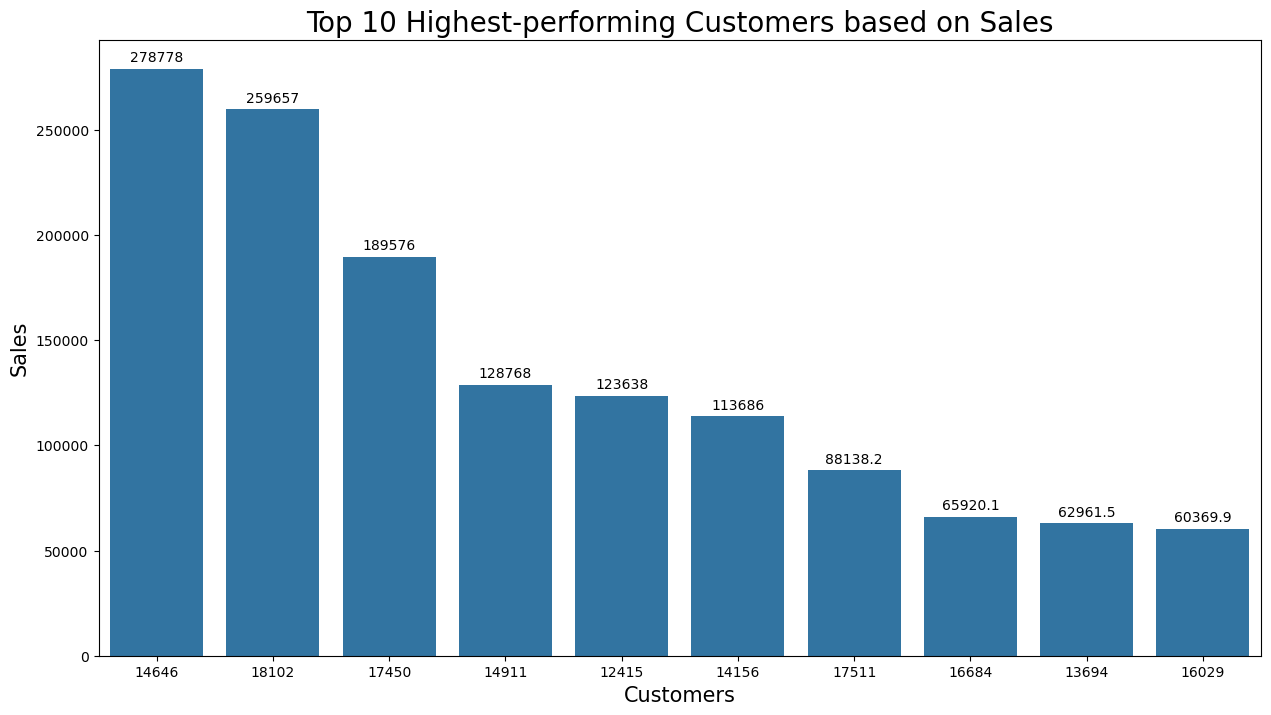

In [77]:
# Top 10 customers based on sales

top10_cust = sales_df.groupby(['CustomerID'])['LineTotal'].sum().sort_values(ascending = False)[:10]
              
plt.figure(figsize = [15, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(x = top10_cust.index, y = top10_cust.values, color = base_color)
ax.tick_params(axis = 'both', labelsize = 10)
ax.bar_label(ax.containers[0], padding = 3)

plt.title('Top 10 Highest-performing Customers based on Sales', size = 20)
plt.xlabel('Customers', size = 15)
plt.ylabel('Sales', size = 15)
plt.show;

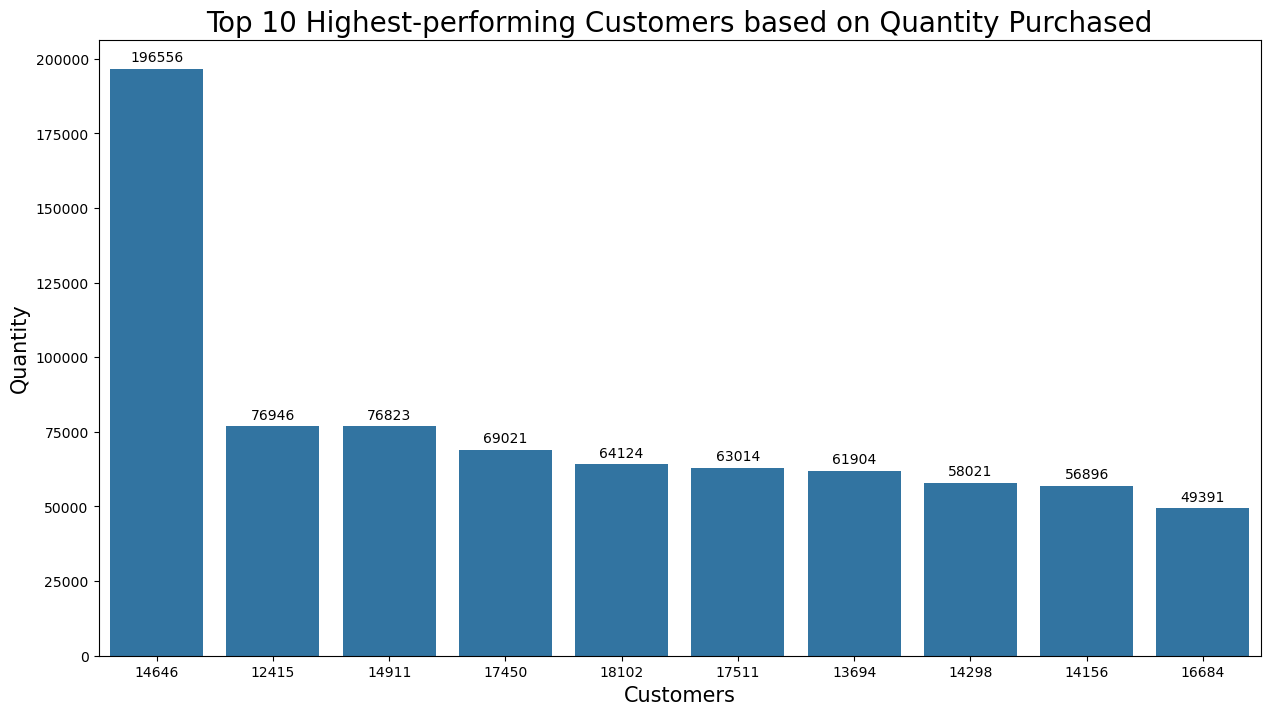

In [78]:
# Top 10 customers based on quantity purchased

top10_cust_qty = sales_df.groupby(['CustomerID'])['Quantity'].sum().sort_values(ascending = False)[:10]
              
plt.figure(figsize = [15, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(x = top10_cust_qty.index, y = top10_cust_qty.values, color = base_color)
ax.tick_params(axis = 'both', labelsize = 10)
ax.bar_label(ax.containers[0], padding = 3)

plt.title('Top 10 Highest-performing Customers based on Quantity Purchased', size = 20)
plt.xlabel('Customers', size = 15)
plt.ylabel('Quantity', size = 15)
plt.show;

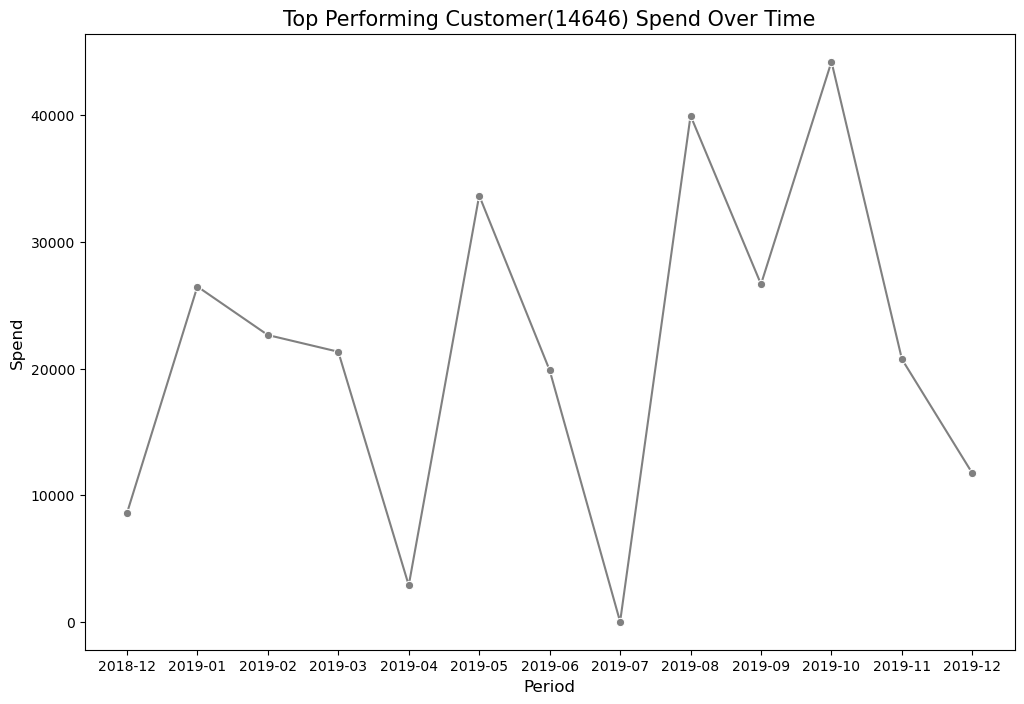

In [79]:
# Customer 14646 Spend Overtime

cust_14646 = sales_df[sales_df['CustomerID'] == '14646'].groupby(['Period'])['LineTotal'].sum().reset_index()

plt.figure(figsize = [12, 8])
# convert period to datetime as seaborn and matplotlib don't support line plotting with period datatype
sns.lineplot(data=cust_14646, x = cust_14646['Period'].astype(str), y = 'LineTotal', color = 'gray', marker = 'o')

plt.title('Top Performing Customer(14646) Spend Over Time', fontsize = 15)
plt.xlabel('Period', size = 12)
plt.ylabel('Spend', size = 12)
plt.show()

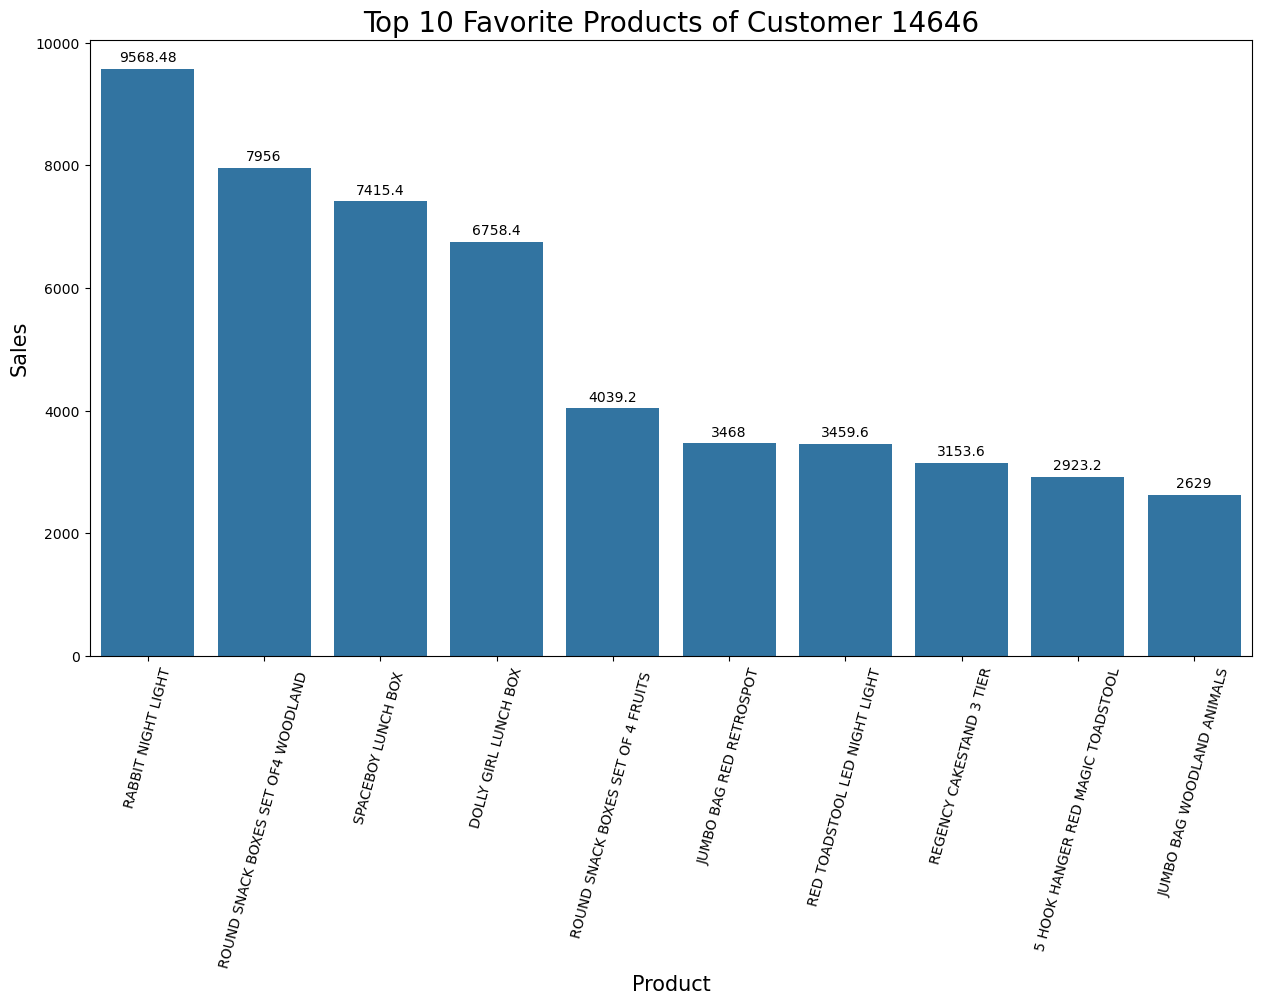

In [80]:
# Favorite products of customer 14646

cust_14646_prod = sales_df[sales_df['CustomerID'] == '14646']\
                    .groupby(['Description'])['LineTotal']\
                    .sum()\
                    .sort_values(ascending = False)[:10]

plt.figure(figsize = [15, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(x = cust_14646_prod.index, y = cust_14646_prod.values, color = base_color)
ax.tick_params(axis = 'both', labelsize = 10)
ax.bar_label(ax.containers[0], padding = 3)

plt.title('Top 10 Favorite Products of Customer 14646', size = 20)
plt.xlabel('Product', size = 15)
plt.ylabel('Sales', size = 15)
plt.xticks(rotation=75)
plt.show;

### 3. Top-performing Products
- Based on sales
- Based on quantity purchased

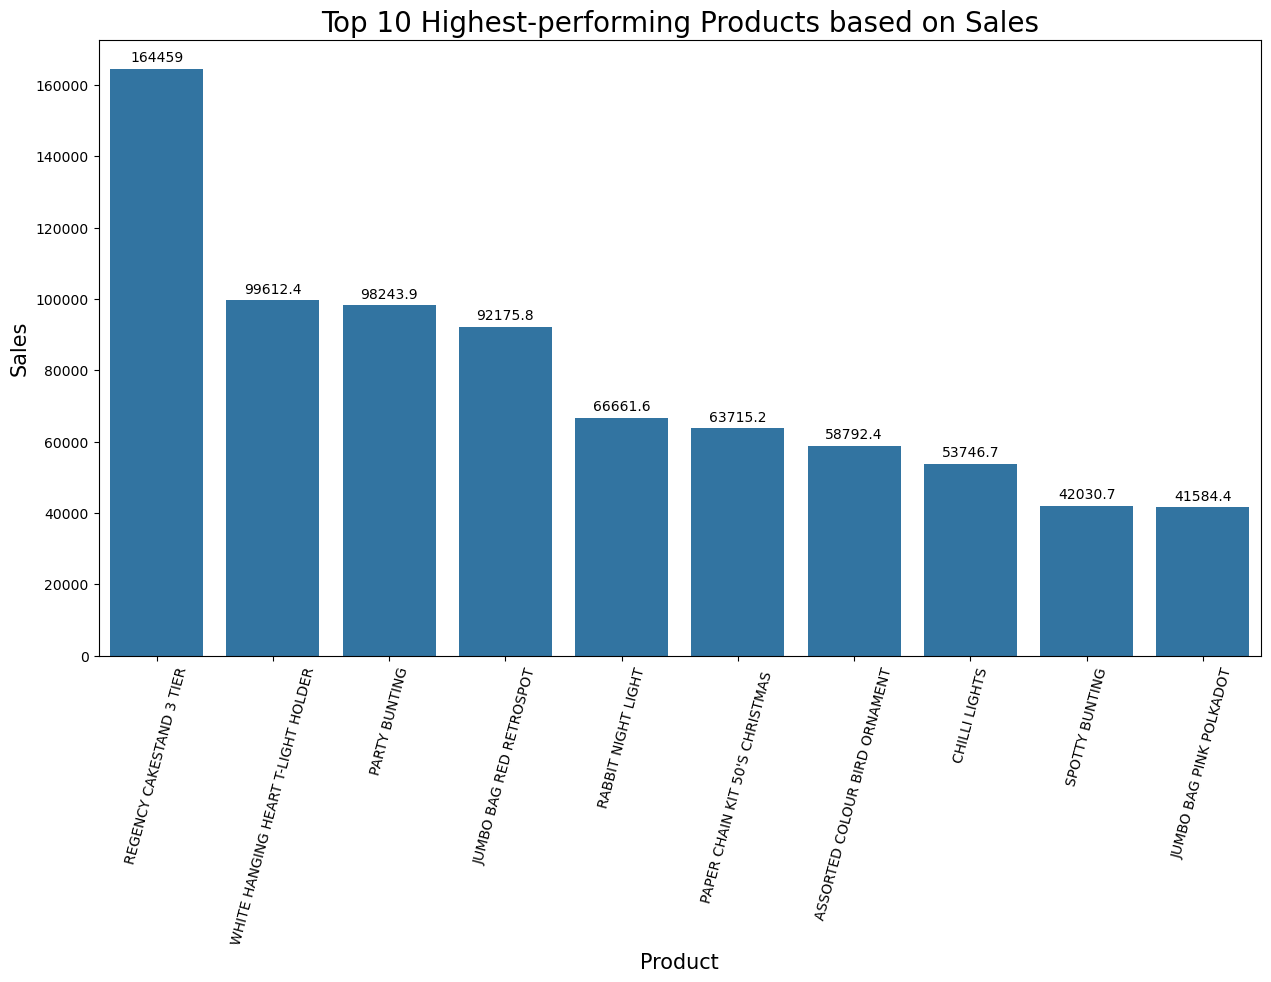

In [81]:
# Top 10 products based on sales

top10_prod = sales_df.groupby(['Description'])['LineTotal'].sum().sort_values(ascending = False)[:10]
              
plt.figure(figsize = [15, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(x = top10_prod.index, y = top10_prod.values, color = base_color)
ax.tick_params(axis = 'both', labelsize = 10)
ax.bar_label(ax.containers[0], padding = 3)

plt.title('Top 10 Highest-performing Products based on Sales', size = 20)
plt.xlabel('Product', size = 15)
plt.ylabel('Sales', size = 15)
plt.xticks(rotation=75)
plt.show;

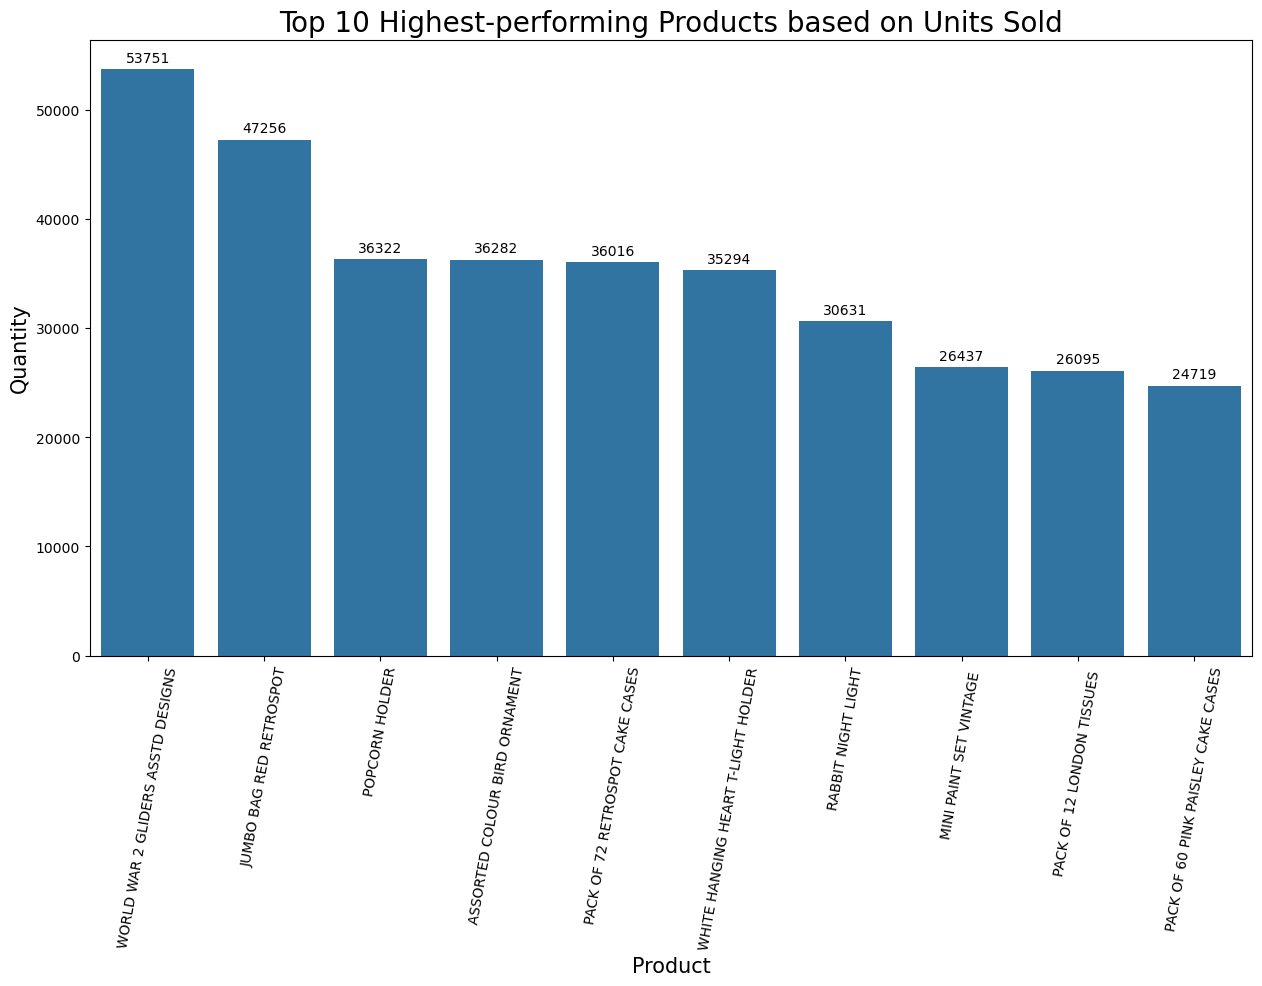

In [82]:
# Top 10 products based on quantity sold

top10_prod_qty = sales_df.groupby(['Description'])['Quantity'].sum().sort_values(ascending = False)[:10]
              
plt.figure(figsize = [15, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(x = top10_prod_qty.index, y = top10_prod_qty.values, color = base_color)
ax.tick_params(axis = 'both', labelsize = 10)
ax.bar_label(ax.containers[0], padding = 3)

plt.title('Top 10 Highest-performing Products based on Units Sold', size = 20)
plt.xlabel('Product', size = 15)
plt.ylabel('Quantity', size = 15)
plt.xticks(rotation=80)
plt.show;

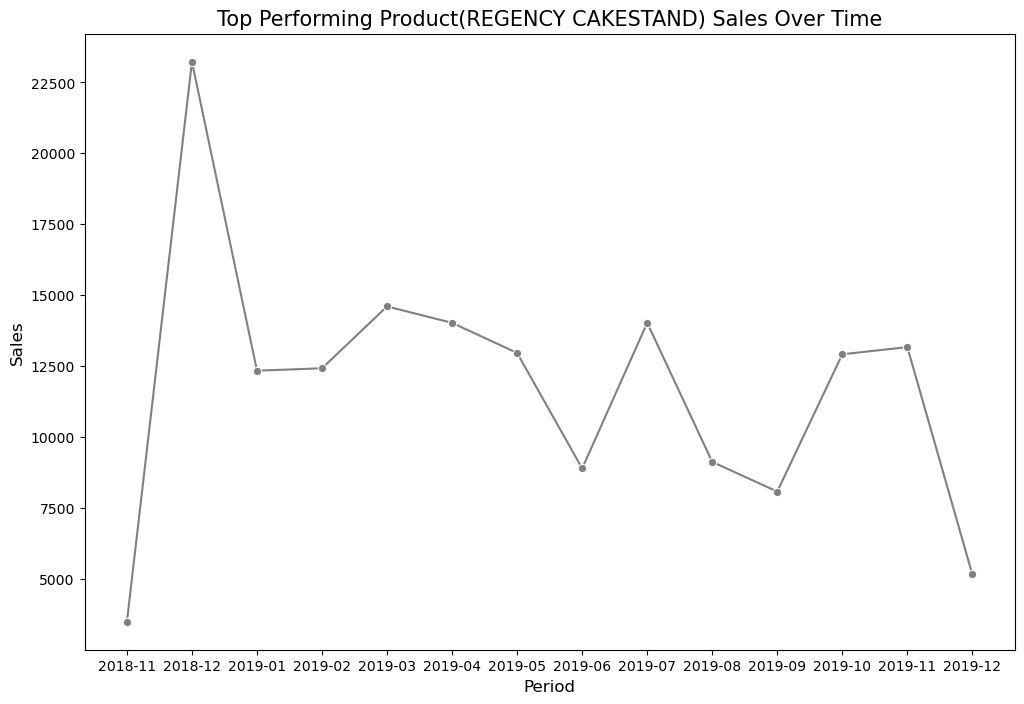

In [83]:
# REGENCY CAKESTAND 3 TIER Sales Overtime

regency = sales_df[sales_df['Description'] == 'REGENCY CAKESTAND 3 TIER'].groupby(['Period'])['LineTotal'].sum().reset_index()

plt.figure(figsize = [12, 8])
# convert period to datetime as seaborn and matplotlib don't support line plotting with period datatype
sns.lineplot(data=regency, x = regency['Period'].astype(str), y = 'LineTotal', color = 'gray', marker = 'o')

plt.title('Top Performing Product(REGENCY CAKESTAND) Sales Over Time', fontsize = 15)
plt.xlabel('Period', size = 12)
plt.ylabel('Sales', size = 12)
plt.show()

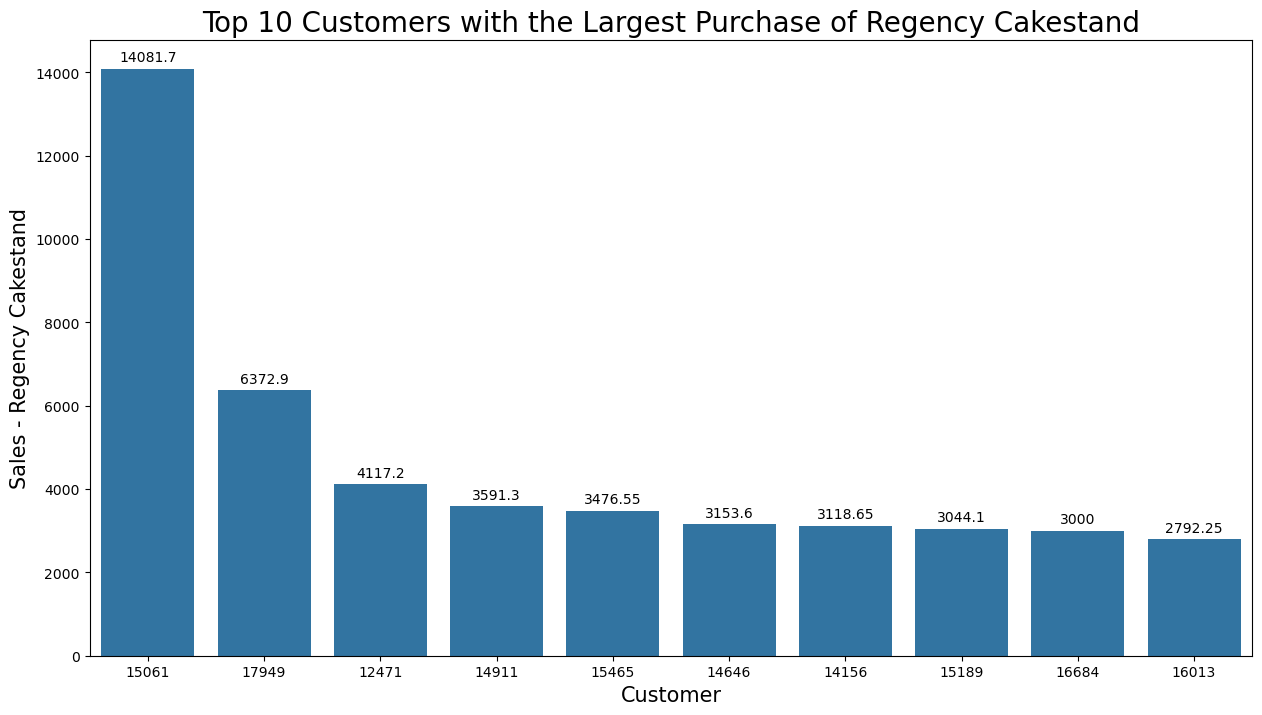

In [84]:
# Top 10 customers with largest spend on Regency Cakestand

regency_cust = sales_df[sales_df['Description'] == 'REGENCY CAKESTAND 3 TIER']\
                    .groupby(['CustomerID'])['LineTotal']\
                    .sum()\
                    .sort_values(ascending = False)[:10]

plt.figure(figsize = [15, 8])
base_color = sns.color_palette()[0]
ax = sns.barplot(x = regency_cust.index, y = regency_cust.values, color = base_color)
ax.tick_params(axis = 'both', labelsize = 10)
ax.bar_label(ax.containers[0], padding = 3)

plt.title('Top 10 Customers with the Largest Purchase of Regency Cakestand', size = 20)
plt.xlabel('Customer', size = 15)
plt.ylabel('Sales - Regency Cakestand', size = 15)
plt.show;

### 4. Sales Performance and Quantity Sold Over Time

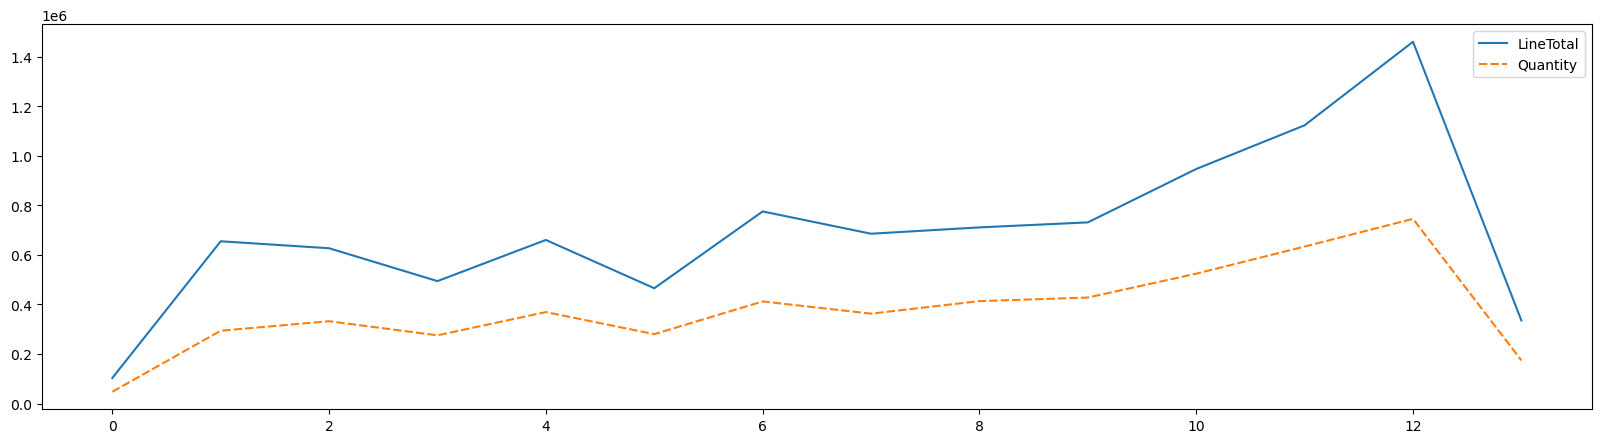

In [85]:
# Monthly sales and units sold (line plots)

monthly_perf = sales_df.groupby(['Period']).agg({
                                                'LineTotal': 'sum',
                                                'Quantity': 'sum'}).reset_index()
plt.figure(figsize = [20, 5])
ax = sns.lineplot(data = monthly_perf)
plt.show()

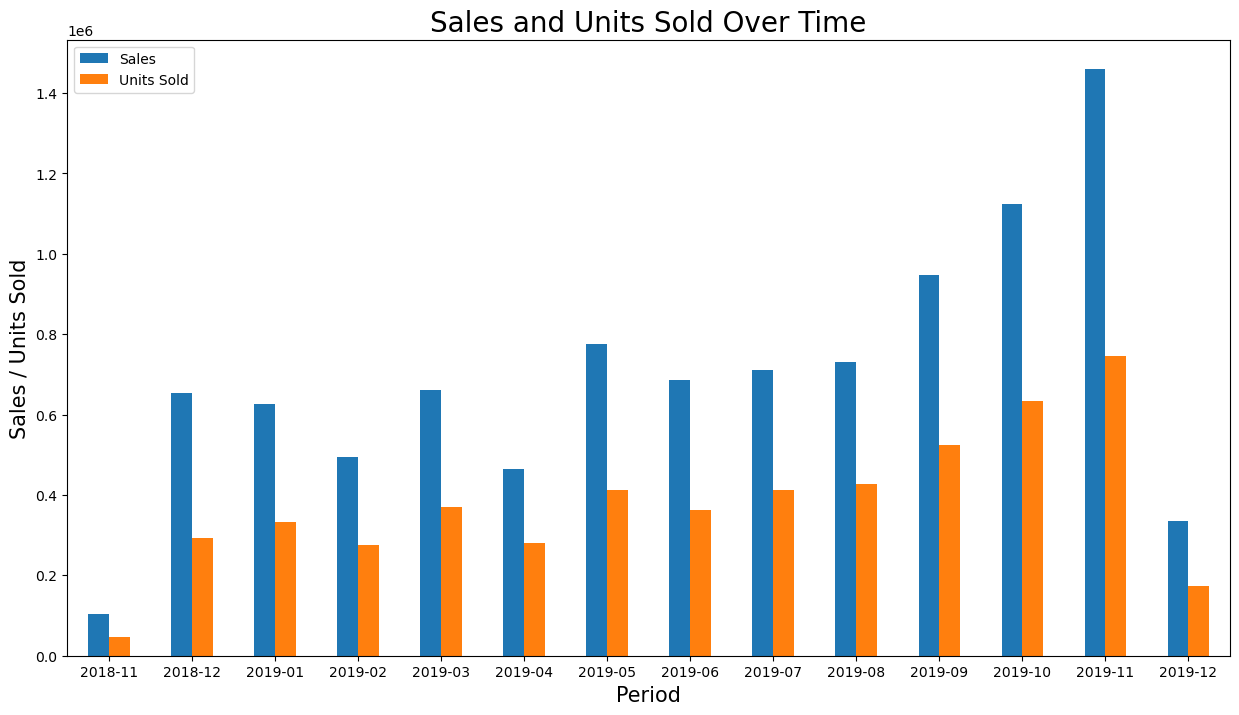

In [86]:
# Monthly sales and units sold (side by side bar plots)


monthly_perf.plot(kind='bar', x = 'Period', figsize = (15, 8))
plt.title('Sales and Units Sold Over Time', fontsize = 20)
plt.xlabel('Period', fontsize = 15)
plt.ylabel('Sales / Units Sold', fontsize = 15)
plt.legend(['Sales', 'Units Sold'])
plt.rcParams["axes.formatter.limits"] = (0, 1400000)
plt.xticks(rotation = 360)
plt.show()

### 5. Statistical relationships between quantity, price, line total, and hour

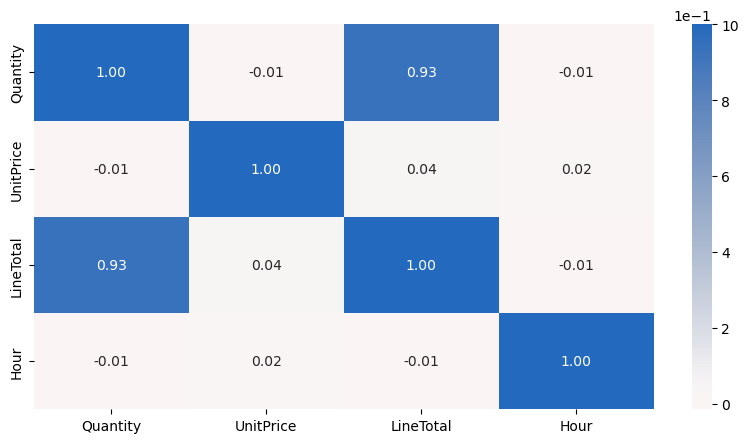

In [87]:
# create a correlation plot between numerical variables
num_var = sales_df.select_dtypes(include=['int','float']).columns.tolist()

plt.figure(figsize = [10, 5])
sns.heatmap(sales_df[num_var].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.show()

The correlation plot shows the following:
1. There is a very strong positive correlation between LineTotal and Quantity, which suggests that larger quantities purchased result to higher sales and smaller quatities result to lower sales.
2. There is a very weak positive correlation between UnitPrice and LineTotal. This suggests that high-priced product don't necessarily result to higher sales or low-priced products don't necessarily result to lower sales.
3. There is also a very weak positive correlation between UnitPrice and Hour. This suggests that high-priced products are not necessarily purchased later in the day or low-priced products earlier in the day. 
4. There is a very weak negative correlation between UnitPrice and Quantity. This suggests that high-priced products are not necessarily purchased less than their low-priced counterparts.

### 6. Daily Number of Orders and Total Sales

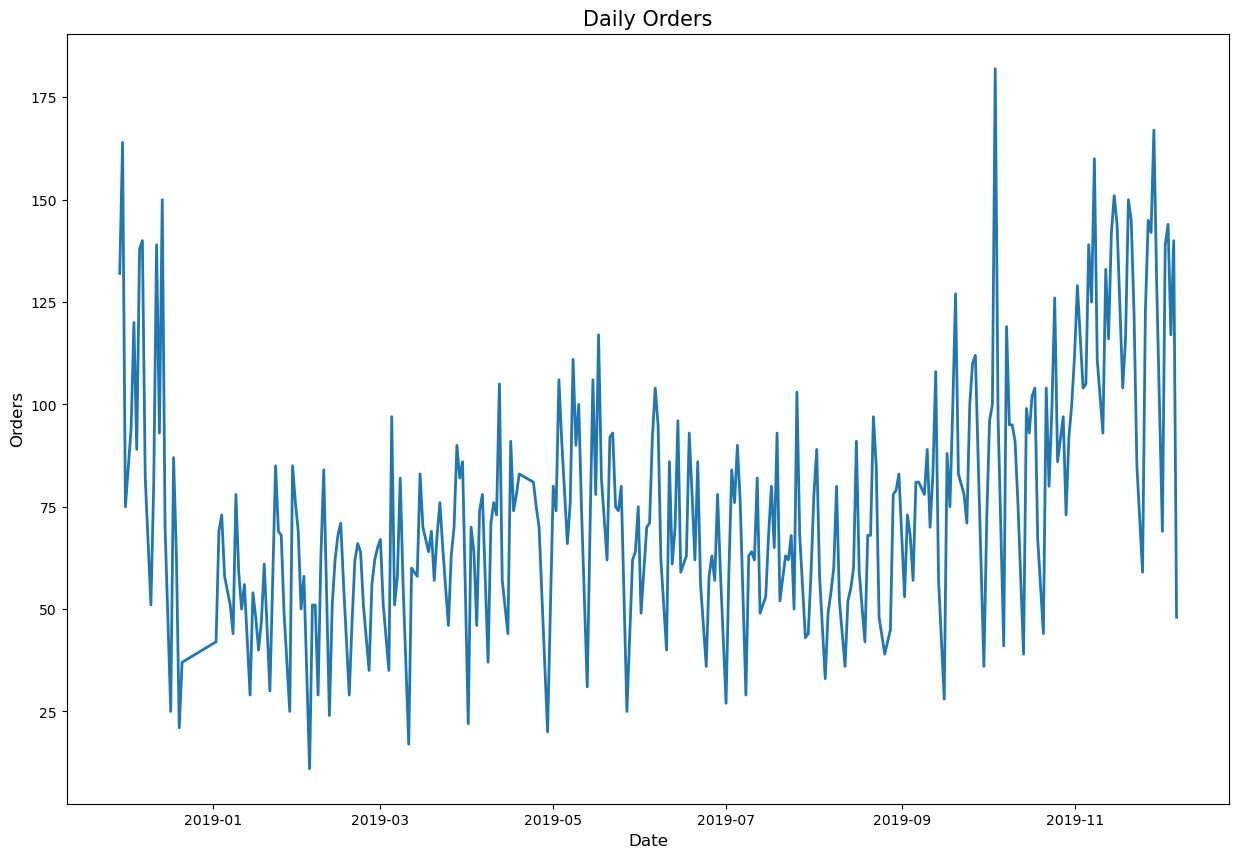

In [88]:
# Daily number of orders

daily_perf = sales_df.groupby(['Date']).agg({
                                    'InvoiceNo': 'nunique',
                                    'LineTotal': 'sum'})

daily_perf['InvoiceNo'].plot(kind = 'line', linewidth = 2, figsize = (15, 10))
plt.title('Daily Orders', fontsize = 15)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Orders', fontsize = 12)
plt.show()

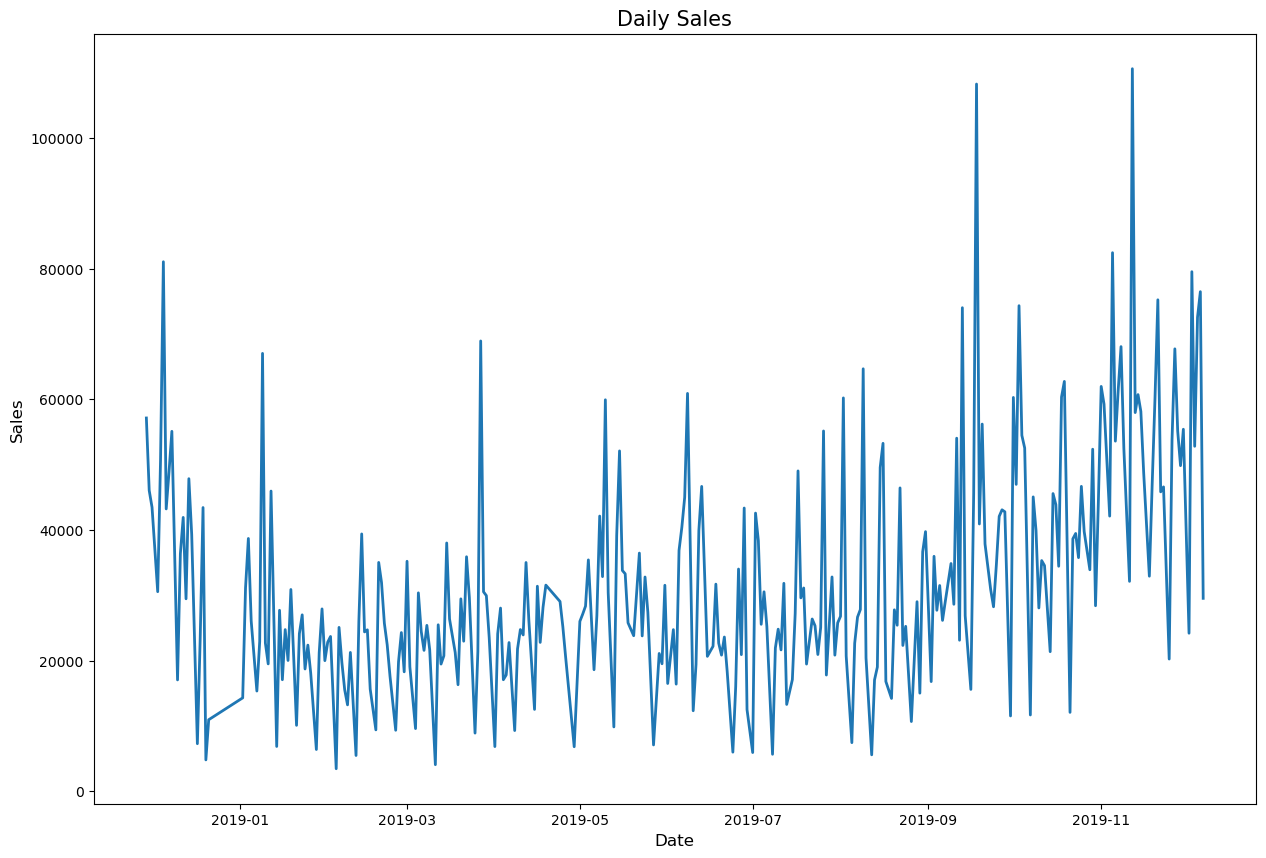

In [89]:
# Daily Sales

daily_perf['LineTotal'].plot(kind = 'line', linewidth = 2, figsize = (15, 10))
plt.title('Daily Sales', fontsize = 15)
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Sales', fontsize = 12)
plt.show()

### 7. Which day of the week has the highest number of orders?

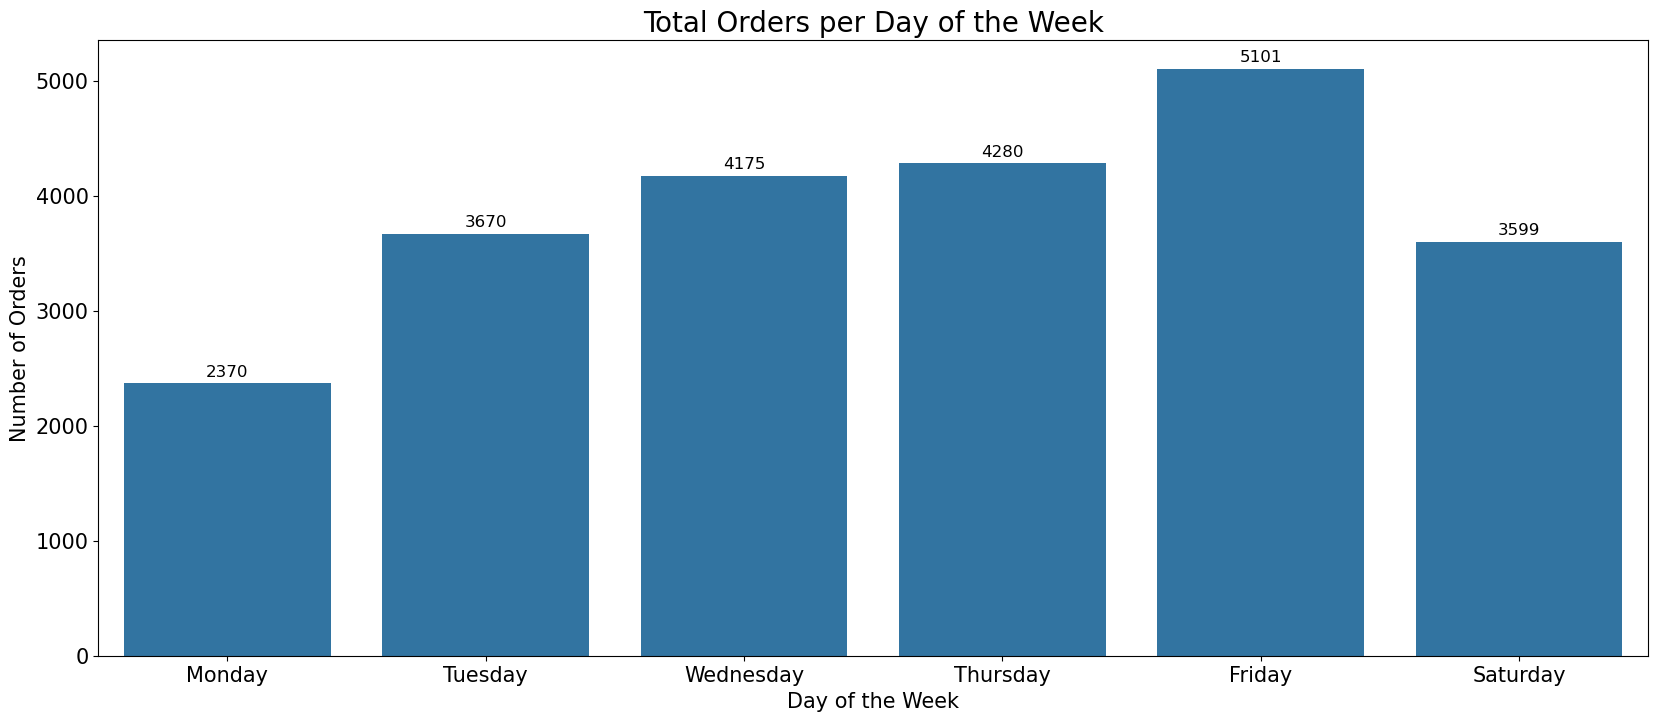

In [90]:
weekday_perf = sales_df.groupby(['Day']).agg({
                                            'InvoiceNo': 'nunique',
                                            'LineTotal': 'sum'}).reset_index()

plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[0]
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

ax = sns.barplot(x = weekday_perf['Day'], y = weekday_perf['InvoiceNo'], color = base_color, order = order)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax.bar_label(ax.containers[0], padding = 3, size = 12)

plt.title('Total Orders per Day of the Week', size = 20)
plt.xlabel('Day of the Week', size = 15)
plt.ylabel('Number of Orders', size = 15)
plt.show();

### 8. Which day of the week has the highest sales?

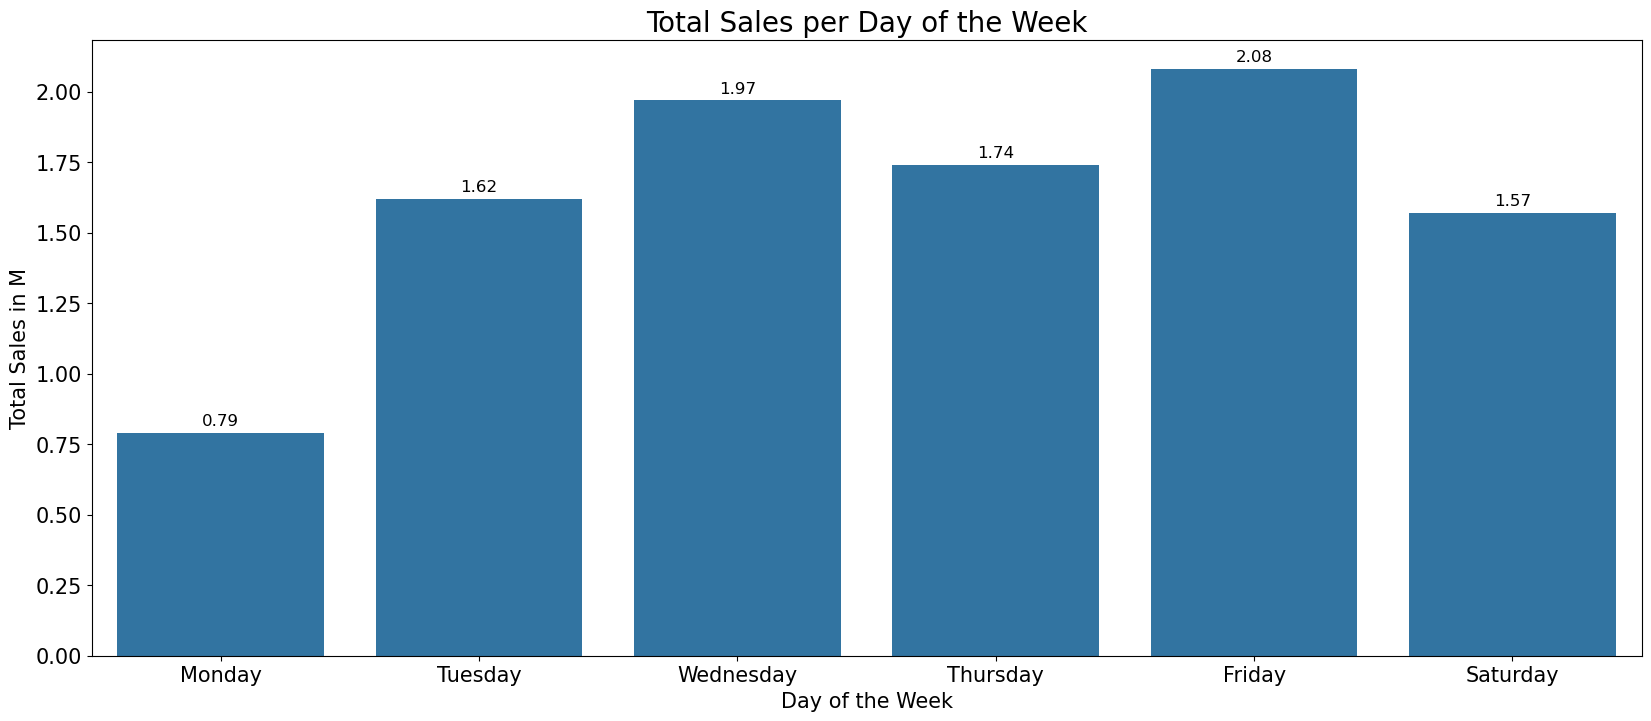

In [91]:
plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[0]
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

ax = sns.barplot(x = weekday_perf['Day'], y = round(weekday_perf['LineTotal']/1000000, 2), color = base_color, order = order)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax.bar_label(ax.containers[0], padding = 3, size = 12)

plt.title('Total Sales per Day of the Week', size = 20)
plt.xlabel('Day of the Week', size = 15)
plt.ylabel('Total Sales in M', size = 15)
plt.show();

### 9. Which time of the day has the highest number of orders?

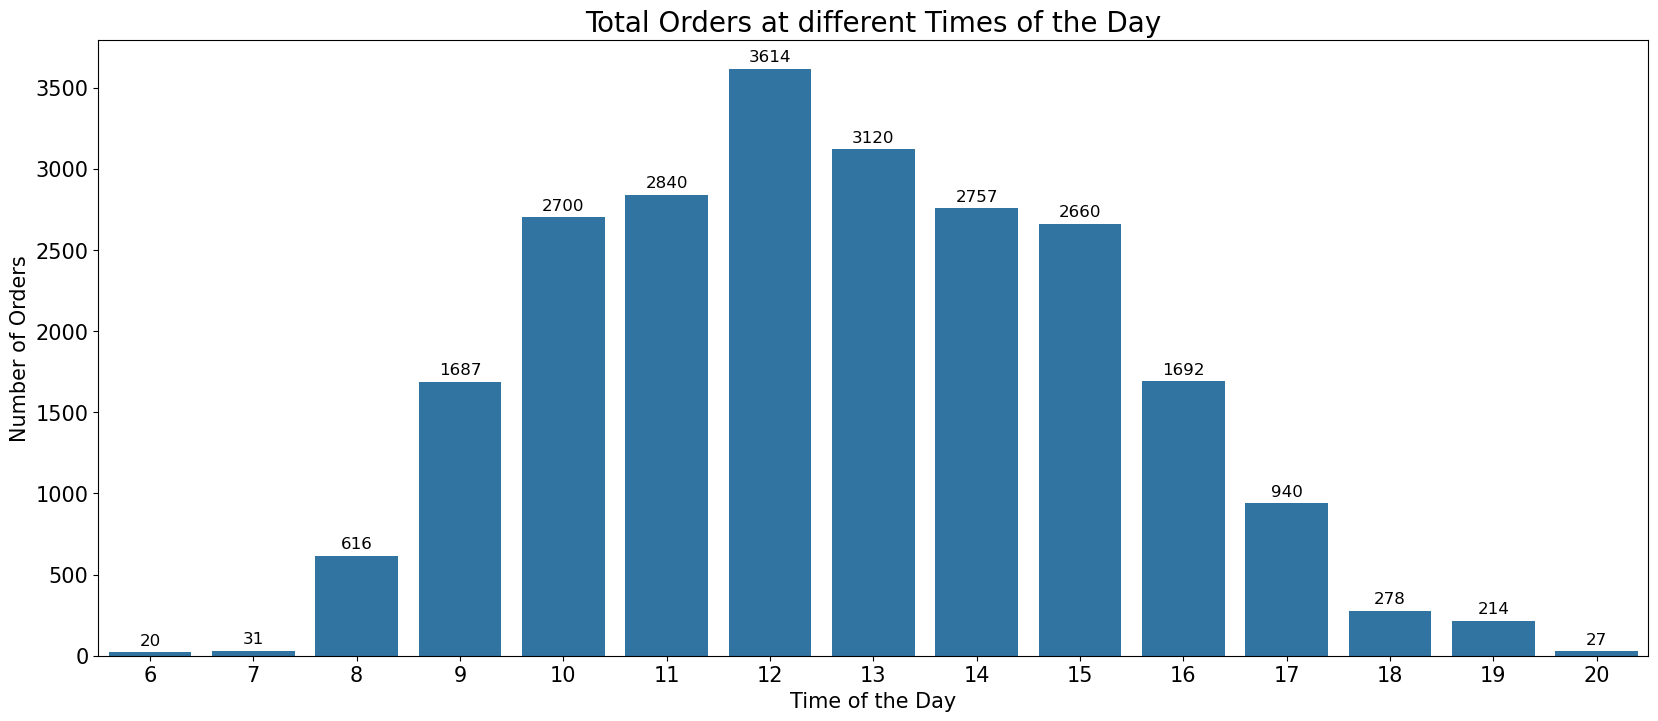

In [92]:
# Total Orders at different Times of the Day

hourly_perf = sales_df.groupby(['Hour']).agg({
    
                                            'InvoiceNo': 'nunique',
                                            'LineTotal': 'sum'}).reset_index()

plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[0]


ax = sns.barplot(x = hourly_perf['Hour'], y = hourly_perf['InvoiceNo'], color = base_color)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax.bar_label(ax.containers[0], padding = 3, size = 12)

plt.title('Total Orders at different Times of the Day', size = 20)
plt.xlabel('Time of the Day', size = 15)
plt.ylabel('Number of Orders', size = 15)
plt.show();

### 10. Which time of the day has the highest sales?

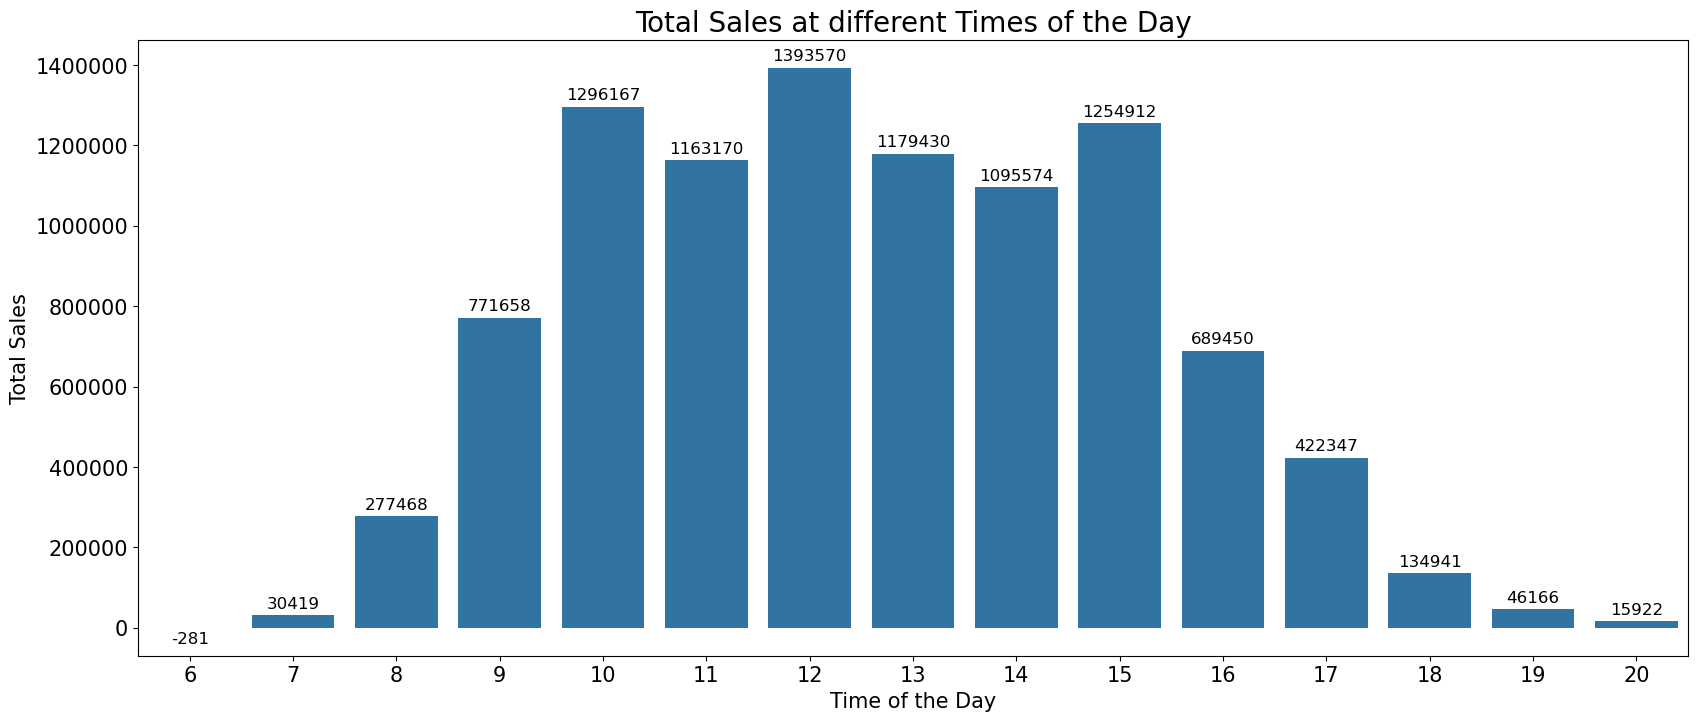

In [93]:
# Total Sales at different Times of the Day

plt.figure(figsize = [20, 8])
base_color = sns.color_palette()[0]

ax = sns.barplot(x = hourly_perf['Hour'], y = hourly_perf['LineTotal'], color = base_color)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
ax.bar_label(ax.containers[0], padding = 3, size = 12, fmt = '%d') # annotates bar plots with labels without scientific notation

plt.title('Total Sales at different Times of the Day', size = 20)
plt.xlabel('Time of the Day', size = 15)
plt.ylabel('Total Sales', size = 15)
plt.show();

In [94]:
# Create a dataframe for cancelled orders

cancelled_orders = sales_df[sales_df['Quantity'] < 0]
cancelled_orders

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,LineTotal,Date,Period,Day,Hour
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2018-11-29 09:49:00,4.65,15311,-4.65,2018-11-29,2018-11,Thursday,9
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2018-11-29 10:24:00,1.65,17548,-19.80,2018-11-29,2018-11,Thursday,10
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548,-6.96,2018-11-29,2018-11,Thursday,10
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548,-6.96,2018-11-29,2018-11,Thursday,10
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2018-11-29 10:24:00,0.29,17548,-6.96,2018-11-29,2018-11,Thursday,10
...,...,...,...,...,...,...,...,...,...,...,...,...
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2019-12-07 09:57:00,1.95,14397,-23.40,2019-12-07,2019-12,Saturday,9
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2019-12-07 09:57:00,0.83,14397,-9.13,2019-12-07,2019-12,Saturday,9
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2019-12-07 11:57:00,10.95,15311,-54.75,2019-12-07,2019-12,Saturday,11
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2019-12-07 11:58:00,1.25,17315,-1.25,2019-12-07,2019-12,Saturday,11


In [95]:
# Load the cancelled orders dataframe to a csv file for dashboard purposes

cancelled_orders.to_csv('../data/cancelled_orders.csv', index = False)

### 11. Which products have the higest amount of cancelled orders?

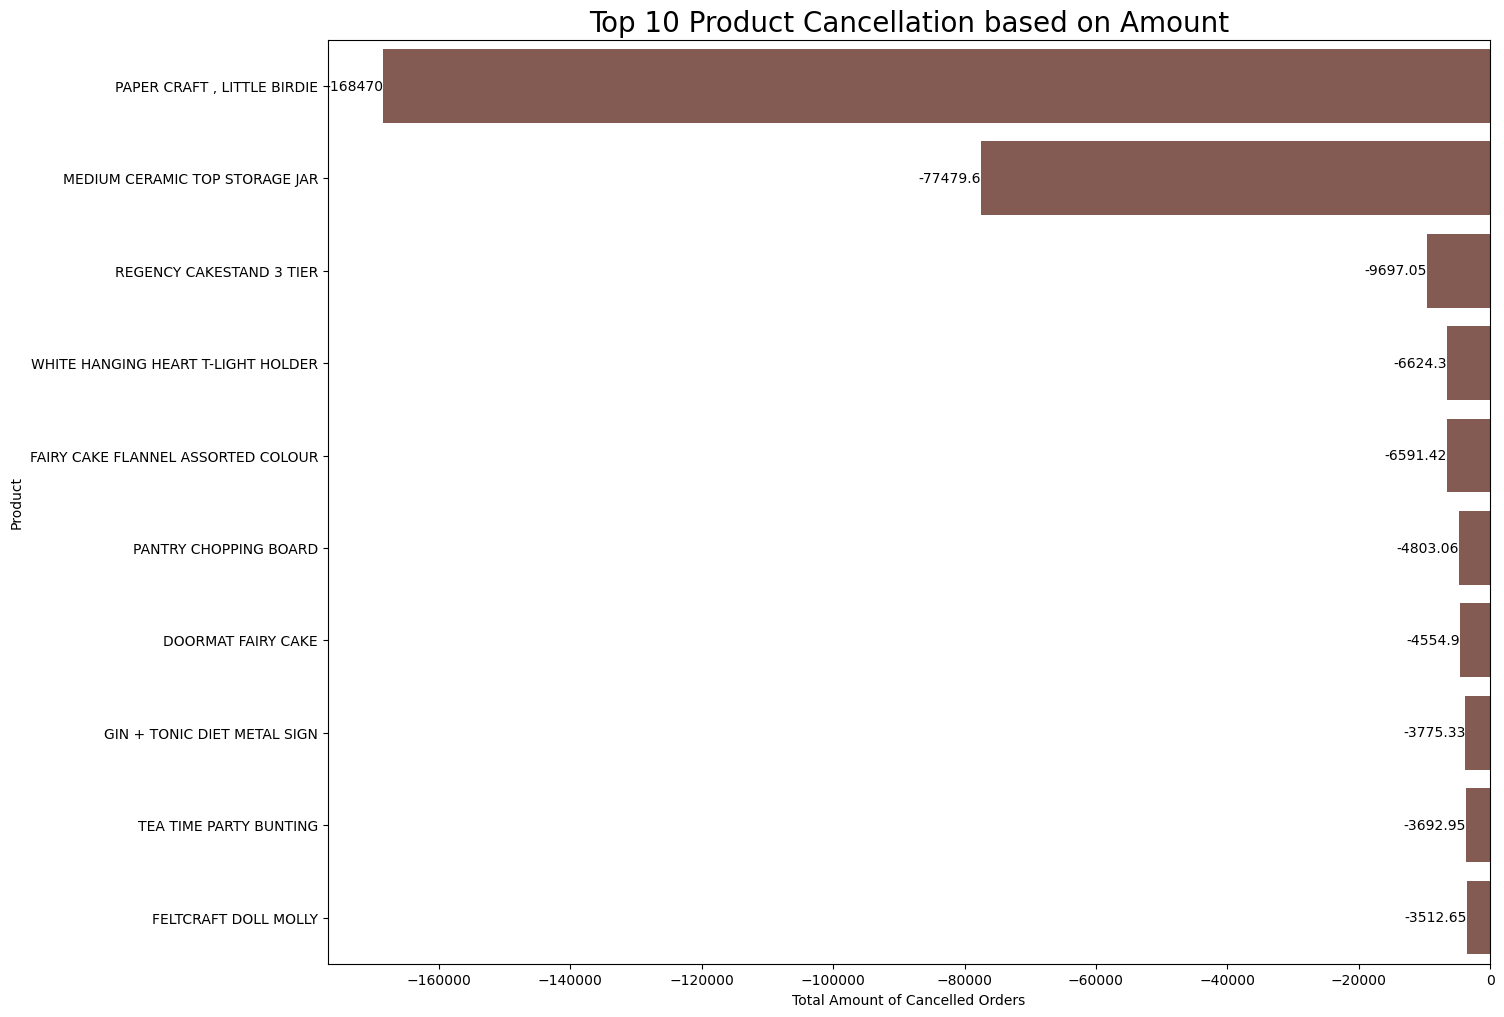

In [96]:
prod_cancelled_amt = cancelled_orders.groupby(['Description'])['LineTotal'].sum().sort_values()[:10]

plt.figure(figsize = [15, 12])
base_color = sns.color_palette()[5]

ax = sns.barplot(x = prod_cancelled_amt.values, y = prod_cancelled_amt.index, color=base_color)
plt.title("Top 10 Product Cancellation based on Amount", size=20)
plt.xlabel("Total Amount of Cancelled Orders", size=10)
plt.ylabel("Product", size=10)
ax.bar_label(ax.containers[0])
plt.show();

### 12. Which products have the largest units of cancelled orders?

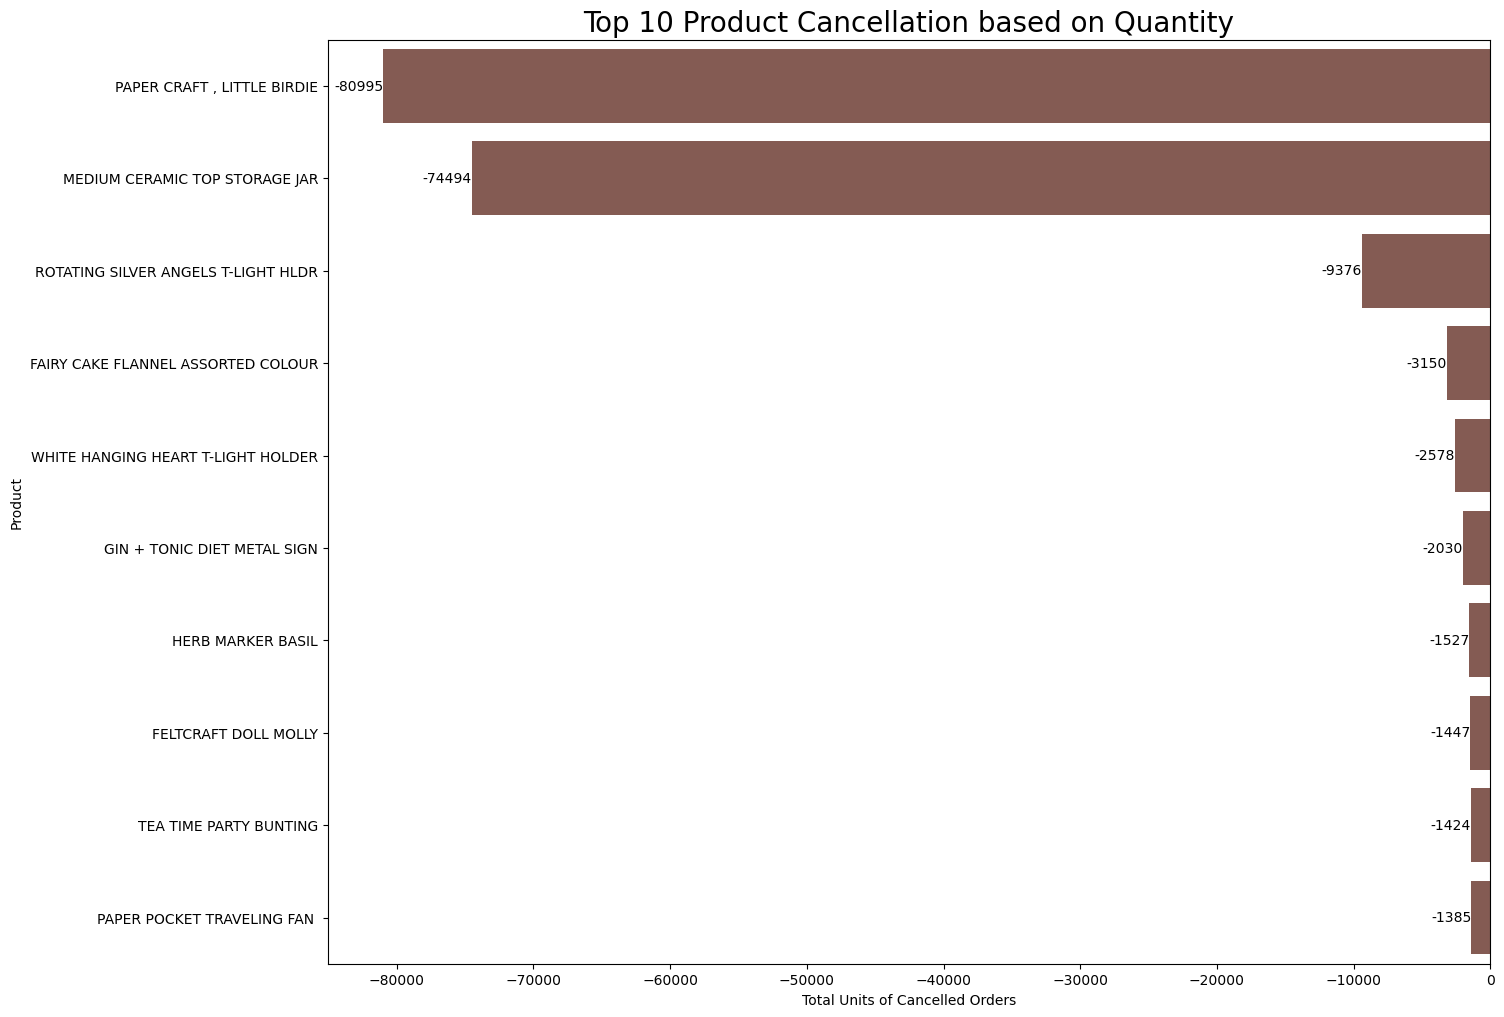

In [97]:
prod_cancelled_qty = cancelled_orders.groupby(['Description'])['Quantity'].sum().sort_values()[:10]

plt.figure(figsize = [15, 12])
base_color = sns.color_palette()[5]

ax = sns.barplot(x = prod_cancelled_qty.values, y = prod_cancelled_qty.index, color=base_color)
plt.title("Top 10 Product Cancellation based on Quantity", size=20)
plt.xlabel("Total Units of Cancelled Orders", size=10)
plt.ylabel("Product", size=10)
ax.bar_label(ax.containers[0])
plt.show();

### 13. What are the most frequently returned products?

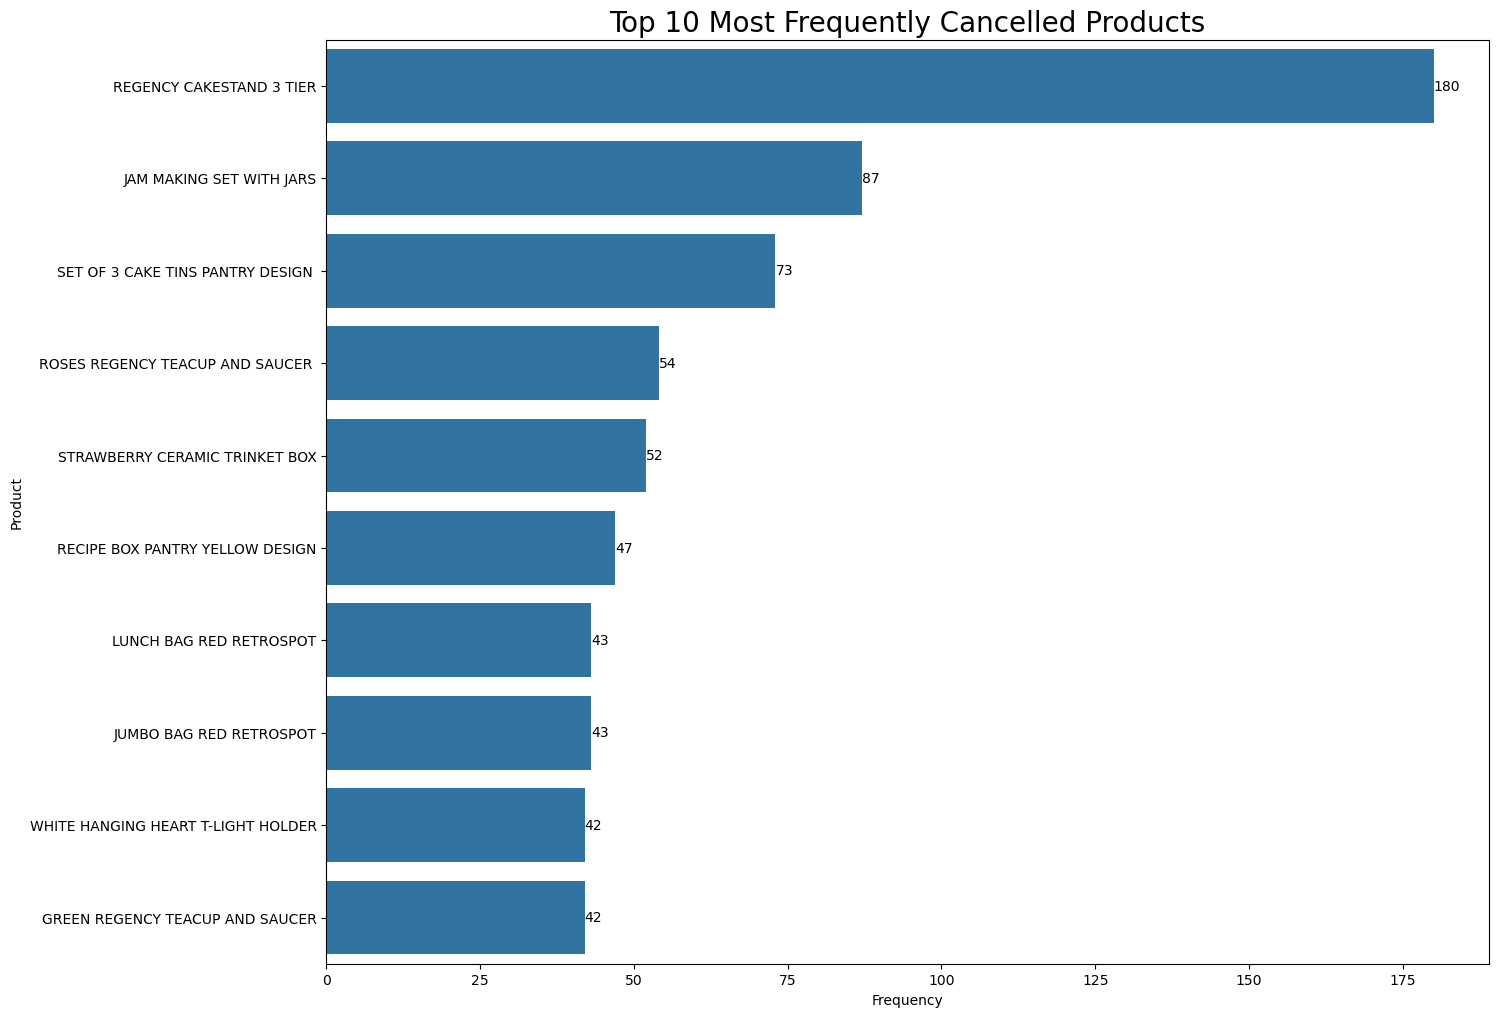

In [98]:
freq_returns = cancelled_orders.groupby(['Description'])['InvoiceNo'].nunique().sort_values(ascending=False)[:10]

plt.figure(figsize = [15, 12])
base_color = sns.color_palette()[0]

ax = sns.barplot(x = freq_returns.values, y = freq_returns.index, color=base_color)
plt.title("Top 10 Most Frequently Cancelled Products", size=20)
plt.xlabel("Frequency", size=10)
plt.ylabel("Product", size=10)
ax.bar_label(ax.containers[0])
plt.show();

### 14. Who are the customers with the highest amount of cancelled orders?

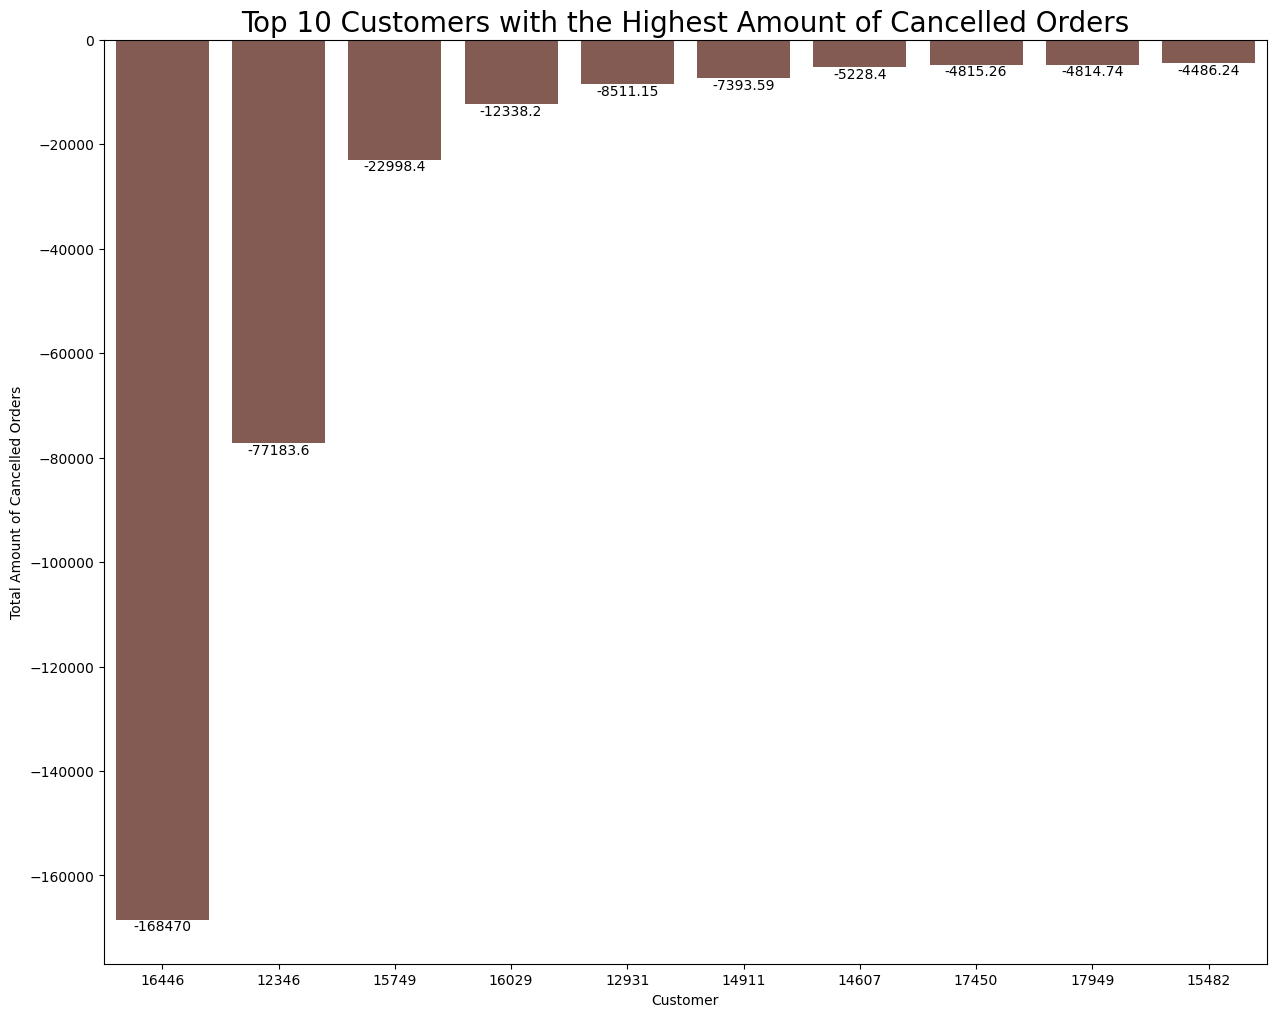

In [99]:
cust_cancelled_amt = cancelled_orders.groupby(['CustomerID'])['LineTotal'].sum().sort_values()[:10]

plt.figure(figsize = [15, 12])
base_color = sns.color_palette()[5]

ax = sns.barplot(x = cust_cancelled_amt.index, y = cust_cancelled_amt.values, color=base_color)
plt.title("Top 10 Customers with the Highest Amount of Cancelled Orders", size=20)
plt.xlabel("Customer", size=10)
plt.ylabel("Total Amount of Cancelled Orders", size=10)
ax.bar_label(ax.containers[0])
plt.show();

### 15. Who are the customers with the largest quantity of cancelled orders?

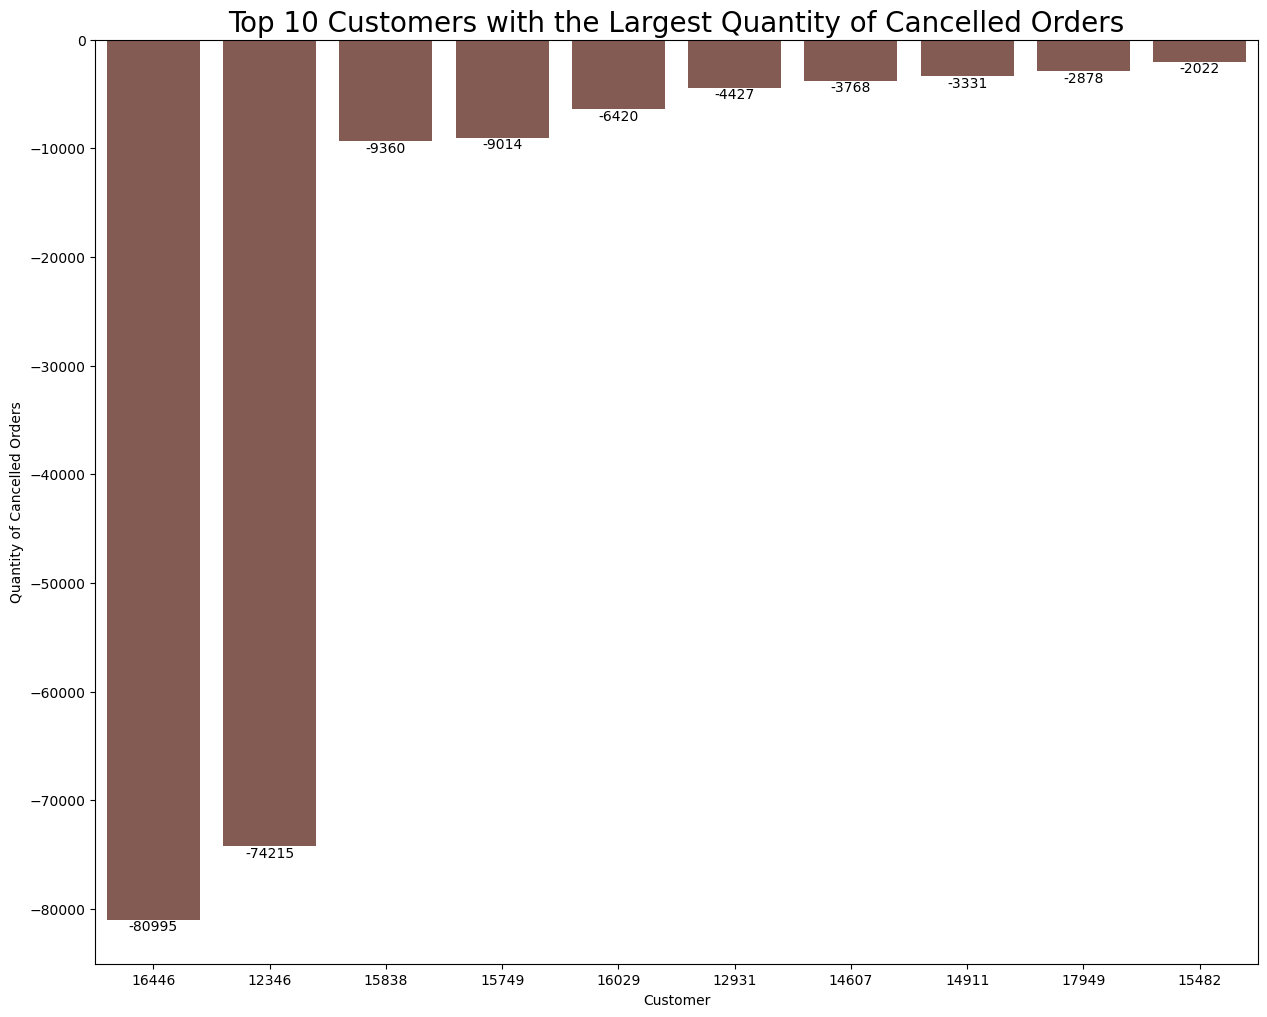

In [100]:
cust_cancelled_qty = cancelled_orders.groupby(['CustomerID'])['Quantity'].sum().sort_values()[:10]

plt.figure(figsize = [15, 12])
base_color = sns.color_palette()[5]

ax = sns.barplot(x = cust_cancelled_qty.index, y = cust_cancelled_qty.values, color=base_color)
plt.title("Top 10 Customers with the Largest Quantity of Cancelled Orders", size=20)
plt.xlabel("Customer", size=10)
plt.ylabel("Quantity of Cancelled Orders", size=10)
ax.bar_label(ax.containers[0])
plt.show();

### 16. Which customers haved cancelled their orders most frequently?

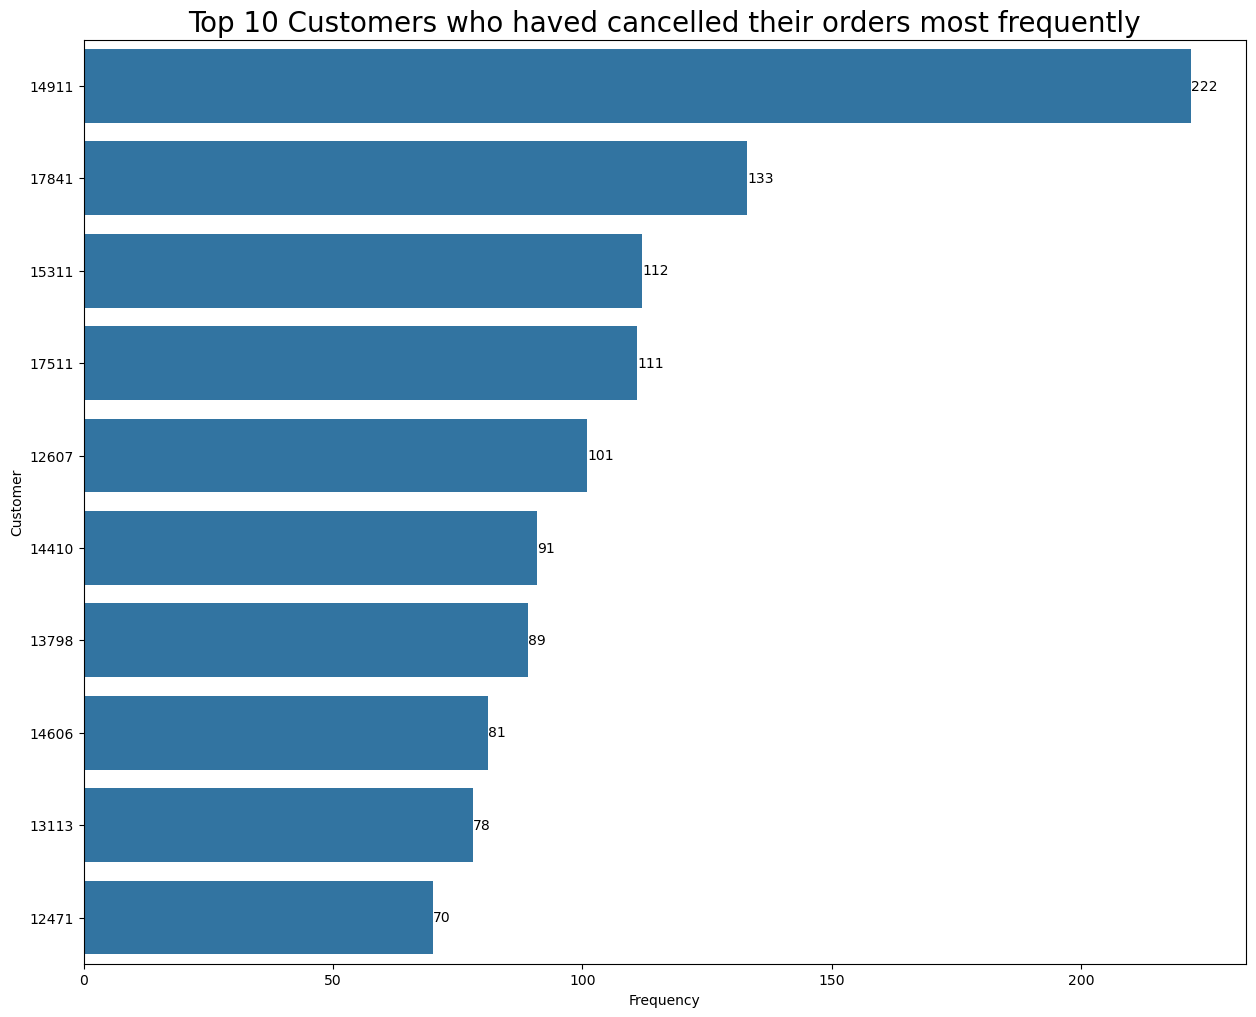

In [101]:
plt.figure(figsize = [15, 12])
base_color = sns.color_palette()[0]

ax = sns.barplot(x = cancelled_orders['CustomerID'].value_counts().values[:10], \
                 y = cancelled_orders['CustomerID'].value_counts().index[:10], color=base_color)
plt.title("Top 10 Customers who haved cancelled their orders most frequently", size=20)
plt.xlabel("Frequency", size=10)
plt.ylabel("Customer", size=10)
ax.bar_label(ax.containers[0])
plt.show();

### 17. Which months have the highest amount of cancelled orders?

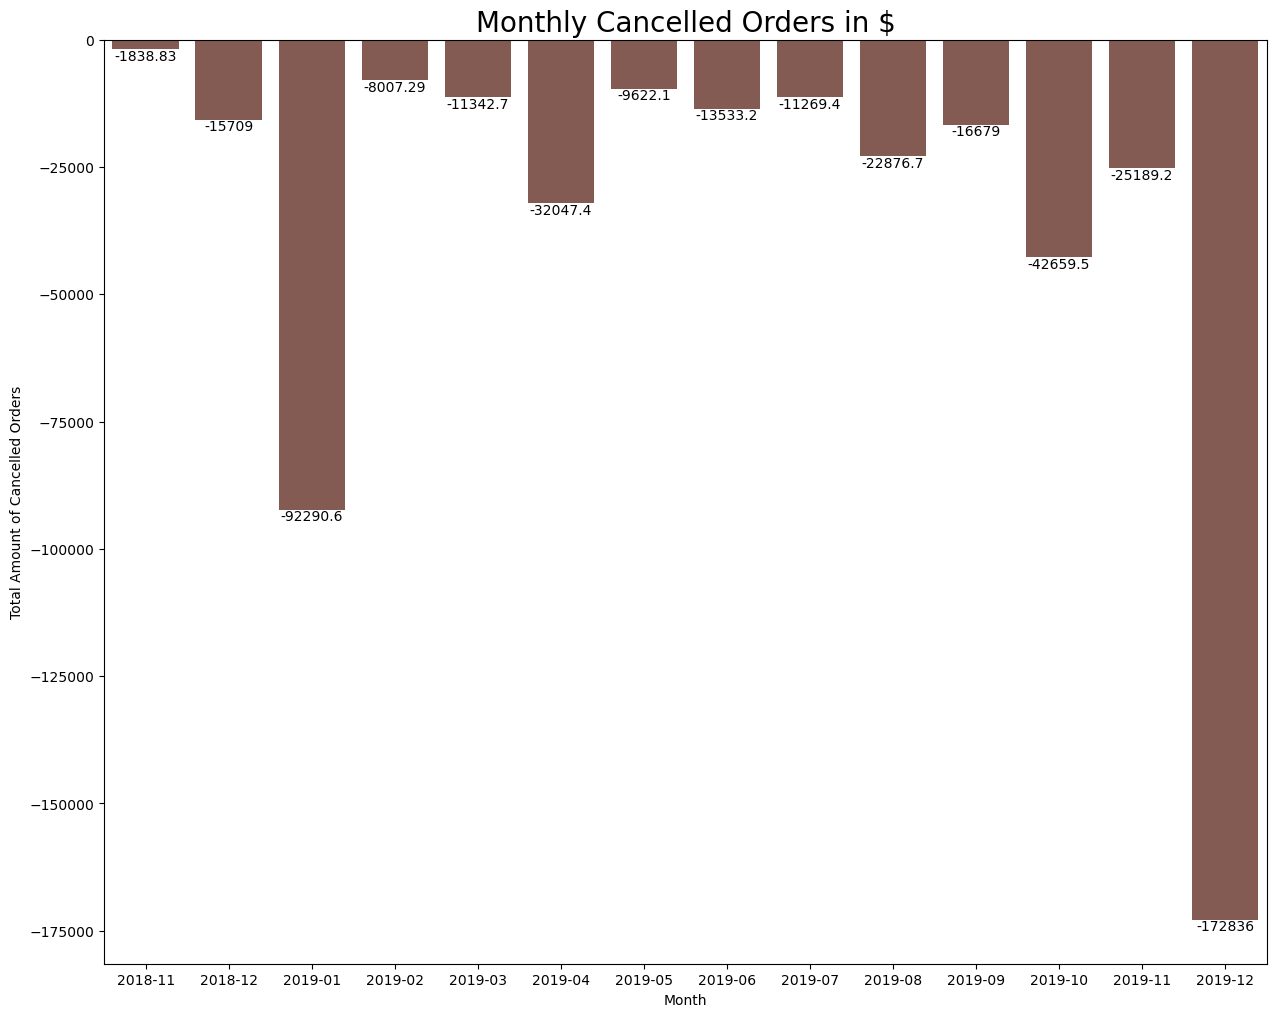

In [102]:
monthly_returns_amt = cancelled_orders.groupby(['Period'])['LineTotal'].sum()

plt.figure(figsize = [15, 12])
base_color = sns.color_palette()[5]

ax = sns.barplot(x = monthly_returns_amt.index, y = monthly_returns_amt.values, color=base_color)
plt.title("Monthly Cancelled Orders in $", size=20)
plt.xlabel("Month", size=10)
plt.ylabel("Total Amount of Cancelled Orders", size=10)
ax.bar_label(ax.containers[0])
plt.show();

### 17. Which months have the largest quantity of cancelled orders?

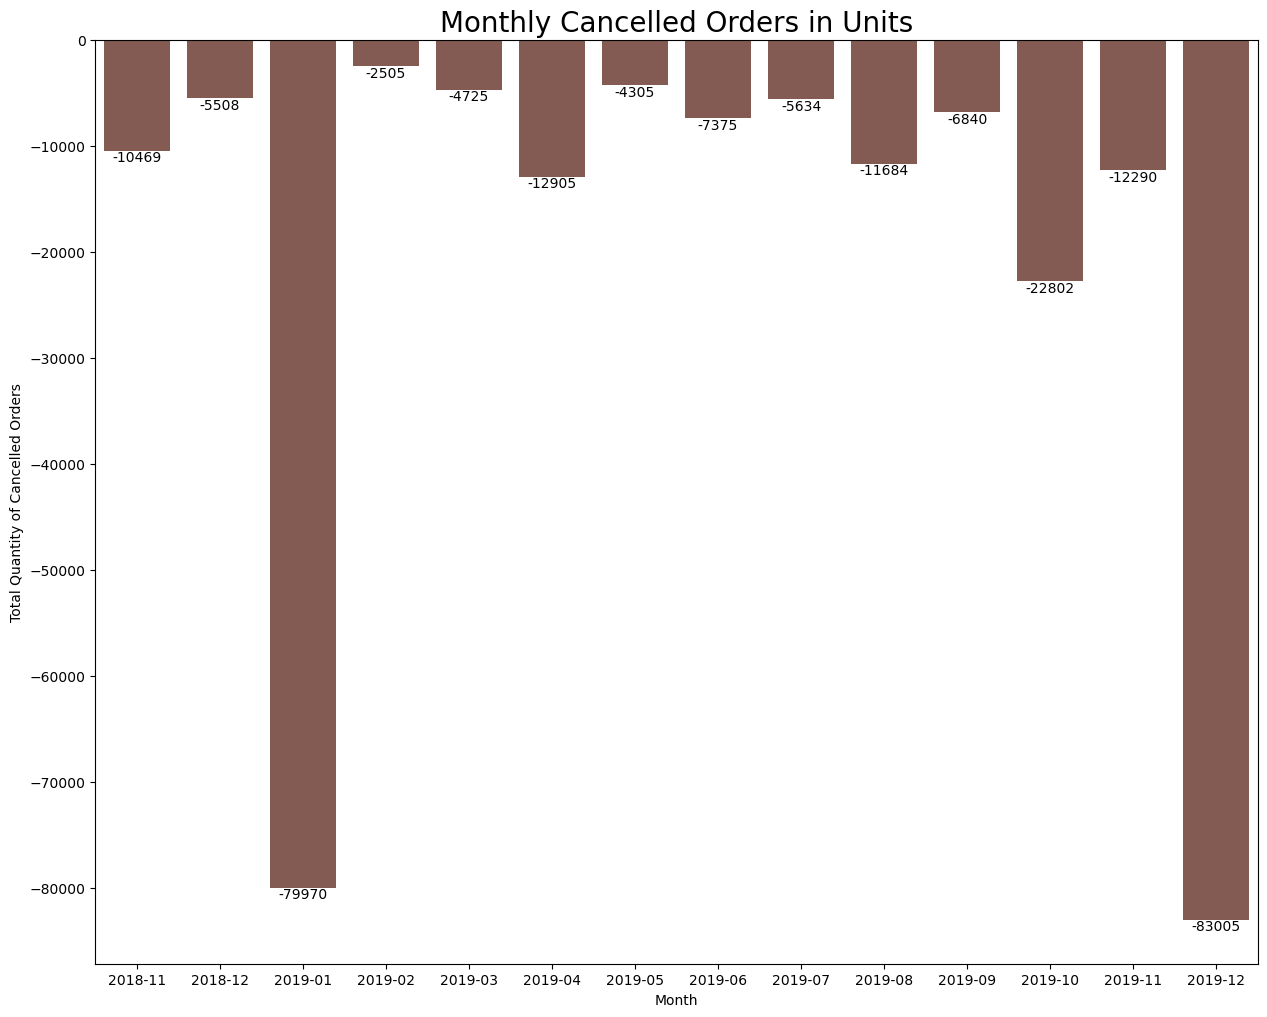

In [103]:
monthly_returns_qty = cancelled_orders.groupby(['Period'])['Quantity'].sum()

plt.figure(figsize = [15, 12])
base_color = sns.color_palette()[5]

ax = sns.barplot(x = monthly_returns_qty.index, y = monthly_returns_qty.values, color=base_color)
plt.title("Monthly Cancelled Orders in Units", size=20)
plt.xlabel("Month", size=10)
plt.ylabel("Total Quantity of Cancelled Orders", size=10)
ax.bar_label(ax.containers[0])
plt.show();